# **Suicide Rates Overview 1985 to 2016**
## Compares socio-economic info with suicide rates by year and country


In [0]:
from google.colab import files, auth, drive
import numpy as np

# Mount to Google drive
drive.mount('/content/gdrive', force_remount=True)
data_dir_drive ='/content/gdrive/My Drive/Colab Notebooks/PML/Proj2/'

Mounted at /content/gdrive


In [0]:
# Unzip dataset to /content
import time

start = time.time()

!unzip -u '/content/gdrive/My Drive/Colab Notebooks/PML/Proj2/suicide-rates-overview-1985-to-2016.zip' -d '/content/gdrive/My Drive/Colab Notebooks/PML/Proj2/'

print('Took', (time.time() - start), ' secundes to unzip')

Archive:  /content/gdrive/My Drive/Colab Notebooks/PML/Proj2/suicide-rates-overview-1985-to-2016.zip
Took 2.6493325233459473  secundes to unzip


In [0]:
! ls '/content/gdrive/My Drive/Colab Notebooks/PML/Proj2/'

'Copie a fișierului Project2PML (1).ipynb'
'Copie a fișierului Project2PML.ipynb'
 master.csv
 Project2PML.ipynb
 suicide-rates-overview-1985-to-2016.zip


# **Utils**
Some utility function to visualize the dataset and the model's predictions

In [0]:
import pandas as pd 

pd.set_option("display.precision", 2)

# read data
df = pd.read_csv(data_dir_drive + 'master.csv') 

# Preview the first 5 lines 
df.head()

country  year  ... gdp_per_capita ($)       generation
0  Albania  1987  ...                796     Generation X
1  Albania  1987  ...                796           Silent
2  Albania  1987  ...                796     Generation X
3  Albania  1987  ...                796  G.I. Generation
4  Albania  1987  ...                796          Boomers

[5 rows x 12 columns]

In [0]:
# print the shape of table
print(df.shape)

(27820, 12)


In [0]:
# print column names
print(df.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [0]:
# print same iformations about each column for table
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB
None


**HDI for year** care is the only column (exclusive feature) that have nulls

---



# **Data Analysis**

In [0]:
# The describe method shows basic statistical characteristics of each 
# numerical feature (int64 and float64 types): number of non-missing values, 
# mean, standard deviation, range, median, 0.25 and 0.75 quartiles.
df.describe()

year  suicides_no  ...  HDI for year  gdp_per_capita ($)
count  27820.00     27820.00  ...       8364.00            27820.00
mean    2001.26       242.57  ...          0.78            16866.46
std        8.47       902.05  ...          0.09            18887.58
min     1985.00         0.00  ...          0.48              251.00
25%     1995.00         3.00  ...          0.71             3447.00
50%     2002.00        25.00  ...          0.78             9372.00
75%     2008.00       131.00  ...          0.85            24874.00
max     2016.00     22338.00  ...          0.94           126352.00

[8 rows x 6 columns]

In [0]:
import matplotlib.pyplot as plt;
import numpy as np

data = df.to_numpy()
print(data)

[['Albania' 1987 'male' ... '2,156,624,900' 796 'Generation X']
 ['Albania' 1987 'male' ... '2,156,624,900' 796 'Silent']
 ['Albania' 1987 'female' ... '2,156,624,900' 796 'Generation X']
 ...
 ['Uzbekistan' 2014 'male' ... '63,067,077,179' 2309 'Generation Z']
 ['Uzbekistan' 2014 'female' ... '63,067,077,179' 2309 'Generation Z']
 ['Uzbekistan' 2014 'female' ... '63,067,077,179' 2309 'Boomers']]



![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Sucide_rate.PNG/1280px-Sucide_rate.PNG)
Suicide rate per 100,000 people by country (1978-2009)

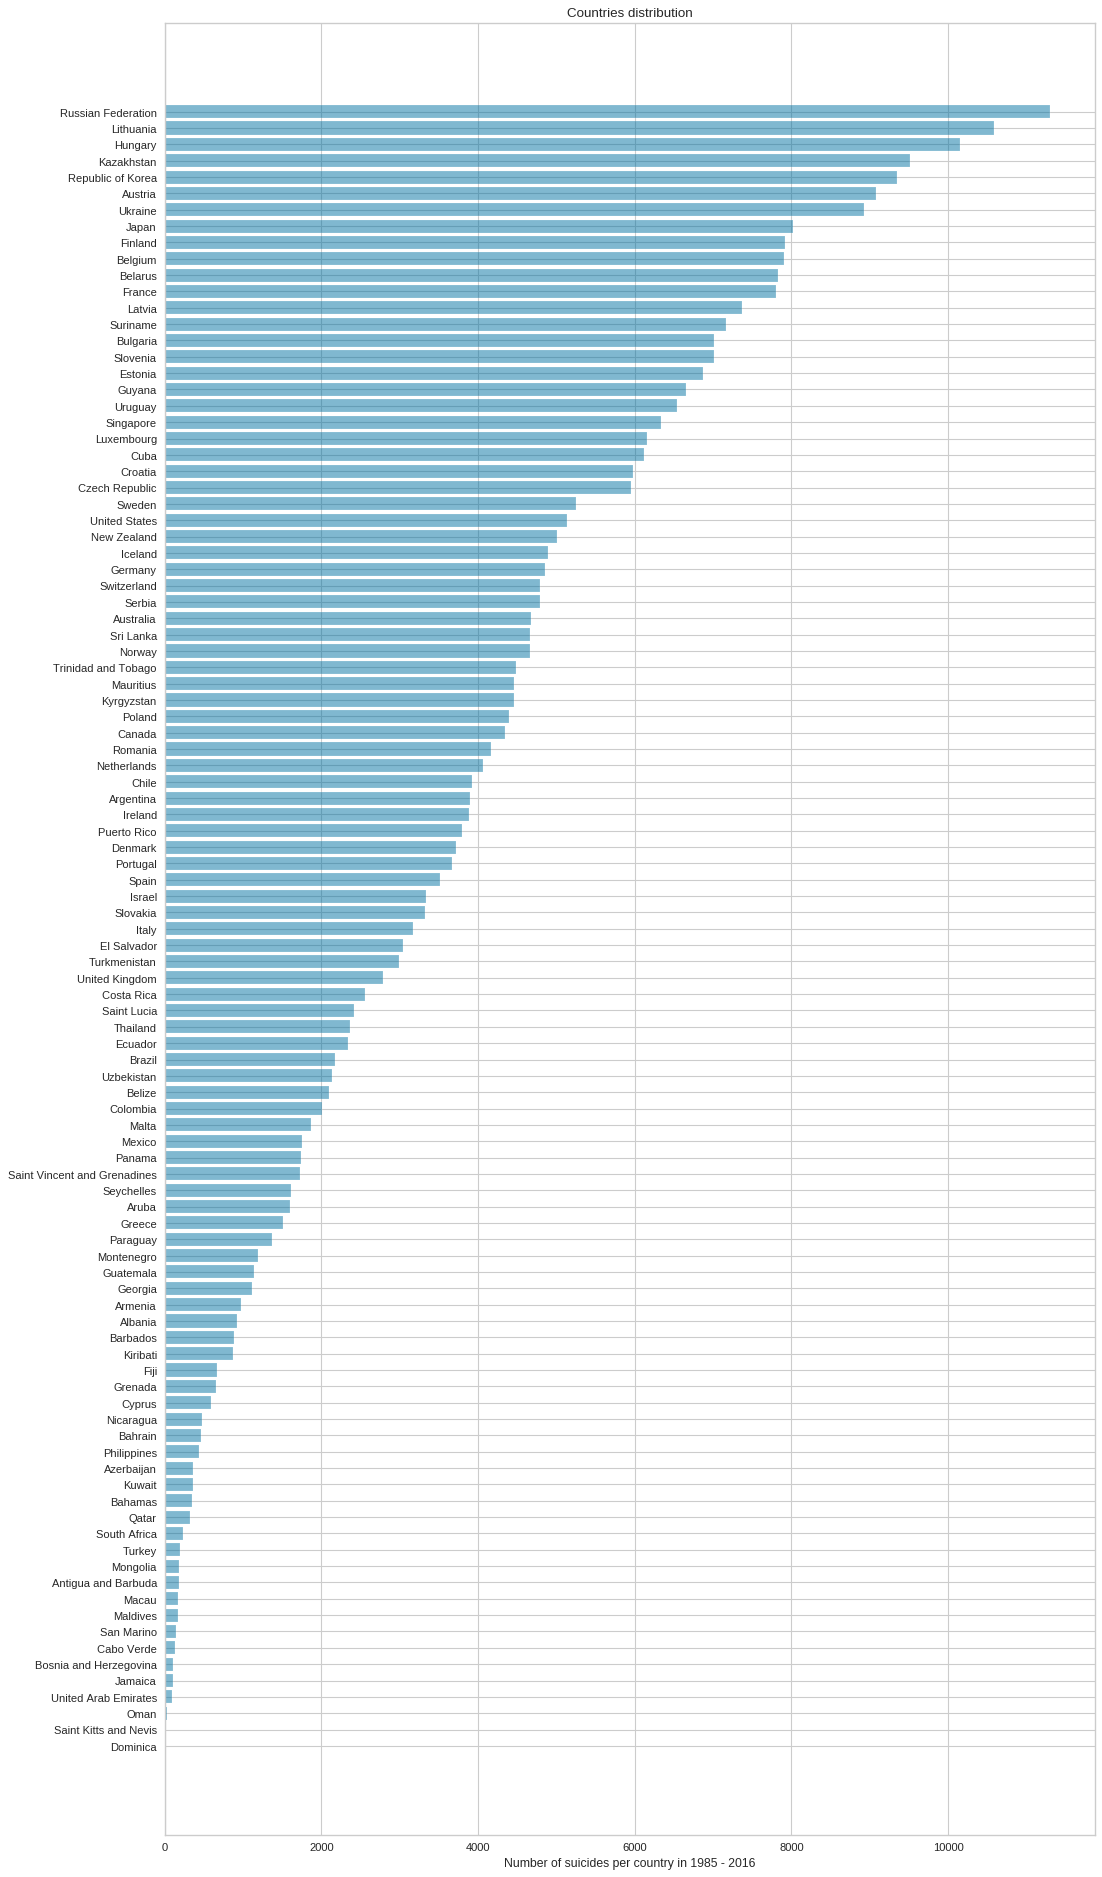

Dominica have 0.0 suicides per 100000
Saint Kitts and Nevis have 0.0 suicides per 100000
Oman have 26.5 suicides per 100000
United Arab Emirates have 94.88999999999997 suicides per 100000
Jamaica have 106.44 suicides per 100000
Bosnia and Herzegovina have 110.81 suicides per 100000
Cabo Verde have 133.84 suicides per 100000
San Marino have 145.62 suicides per 100000
Maldives have 164.08 suicides per 100000
Macau have 171.74000000000004 suicides per 100000
Antigua and Barbuda have 179.14 suicides per 100000
Mongolia have 184.39 suicides per 100000
Turkey have 199.17000000000004 suicides per 100000
South Africa have 231.48999999999998 suicides per 100000
Qatar have 318.1499999999998 suicides per 100000
Bahamas have 344.28000000000003 suicides per 100000
Kuwait have 355.9300000000001 suicides per 100000
Azerbaijan have 356.2400000000002 suicides per 100000
Philippines have 435.83000000000004 suicides per 100000
Bahrain have 467.24000000000007 suicides per 100000
Nicaragua have 472.8200000

In [0]:
# The distribution of suicides by countries
countries = data[:, 0]
objects = sorted(set(countries))
y_pos = np.arange(len(objects))
nr = []
for country in objects:
    nr.append(np.sum(np.dot((countries == country), data[:, 6]))) # population-related

fig=plt.figure(figsize=(15, 30), dpi= 80, facecolor='w', edgecolor='k')

order = np.argsort(nr)
nr = np.array(nr)[order]
objects = np.array(objects)[order]

plt.barh(y_pos, nr, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of suicides per country in 1985 - 2016')
plt.title('Countries distribution')

plt.show()

for idx in range(len(objects)):
    print(objects[idx] + ' have ' + str(nr[idx]) + ' suicides per 100000')

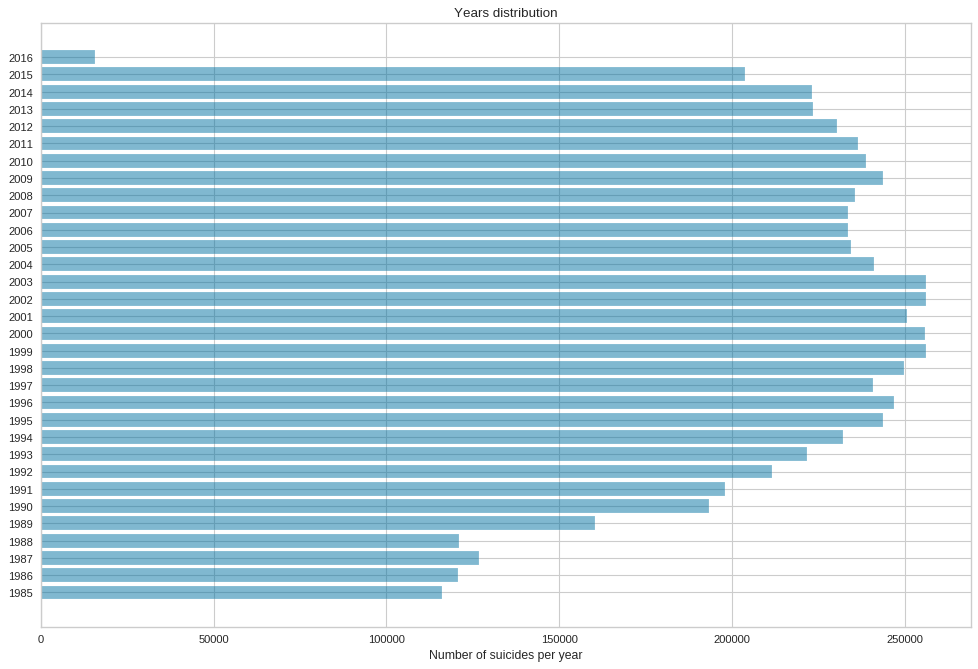

1985 have 116063 suicides
1986 have 120670 suicides
1987 have 126842 suicides
1988 have 121026 suicides
1989 have 160244 suicides
1990 have 193361 suicides
1991 have 198020 suicides
1992 have 211473 suicides
1993 have 221565 suicides
1994 have 232063 suicides
1995 have 243544 suicides
1996 have 246725 suicides
1997 have 240745 suicides
1998 have 249591 suicides
1999 have 256119 suicides
2000 have 255832 suicides
2001 have 250652 suicides
2002 have 256095 suicides
2003 have 256079 suicides
2004 have 240861 suicides
2005 have 234375 suicides
2006 have 233361 suicides
2007 have 233408 suicides
2008 have 235447 suicides
2009 have 243487 suicides
2010 have 238702 suicides
2011 have 236484 suicides
2012 have 230160 suicides
2013 have 223199 suicides
2014 have 222984 suicides
2015 have 203640 suicides
2016 have 15603 suicides


In [0]:
# The distribution of suicides by years
years = data[:, 1]
objects = sorted(set(years))
y_pos = np.arange(len(objects))
nr = []
for year in objects:
    nr.append(np.sum(np.dot((years == year), data[:, 4])))

fig=plt.figure(figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.barh(y_pos, nr, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of suicides per year')
plt.title('Years distribution')

plt.show()

for idx in range(len(objects)):
    print(str(objects[idx]) + ' have ' + str(nr[idx]) + ' suicides')

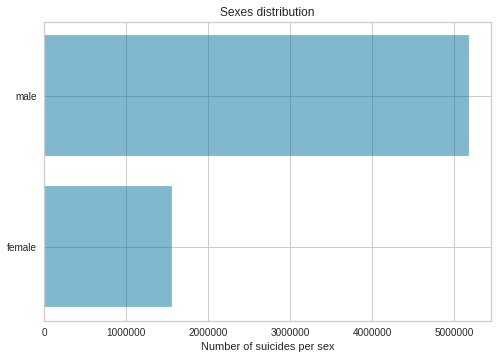

female have 1559510 suicides
male have 5188910 suicides


In [0]:
# The distribution of suicides by sexes
sexes = data[:, 2]
objects = sorted(set(sexes))
y_pos = np.arange(len(objects))
nr = []
for sex in objects:
    nr.append(np.sum(np.dot((sexes == sex), data[:, 4])))

plt.barh(y_pos, nr, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of suicides per sex')
plt.title('Sexes distribution')

plt.show()

for idx in range(len(objects)):
    print(objects[idx] + ' have ' + str(nr[idx]) + ' suicides')

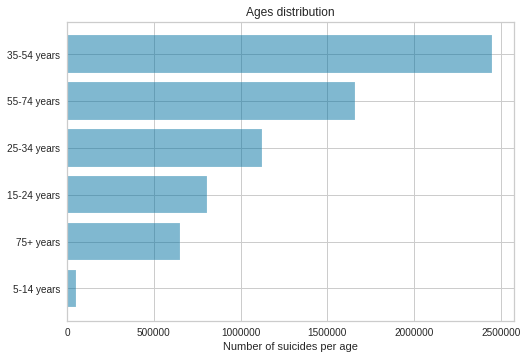

5-14 years have 52264 suicides
75+ years have 653118 suicides
15-24 years have 808542 suicides
25-34 years have 1123912 suicides
55-74 years have 1658443 suicides
35-54 years have 2452141 suicides


In [0]:
# The distribution of suicides by age categories
ages = data[:, 3]
objects = sorted(set(ages))
y_pos = np.arange(len(objects))
nr = []
for age in objects:
    nr.append(np.sum(np.dot((ages == age), data[:, 4])))

order = np.argsort(nr)
nr = np.array(nr)[order]
objects = np.array(objects)[order]

plt.barh(y_pos, nr, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of suicides per age')
plt.title('Ages distribution')

plt.show()

for idx in range(len(objects)):
    print(objects[idx] + ' have ' + str(nr[idx]) + ' suicides')

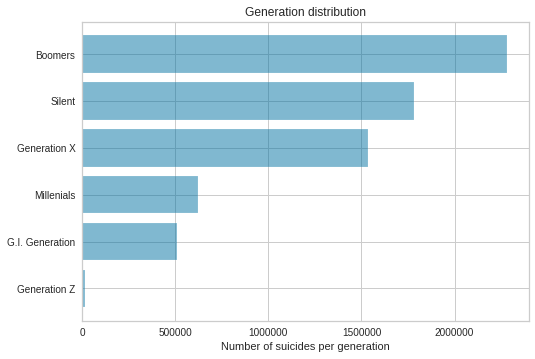

Generation Z have 15906 suicides
G.I. Generation have 510009 suicides
Millenials have 623459 suicides
Generation X have 1532804 suicides
Silent have 1781744 suicides
Boomers have 2284498 suicides


In [0]:
# The distribution of suicides by generation
gens = data[:, 11]
objects = sorted(set(gens))
y_pos = np.arange(len(objects))
nr = []
for gen in objects:
    nr.append(np.sum(np.dot((gens == gen), data[:, 4])))

order = np.argsort(nr)
nr = np.array(nr)[order]
objects = np.array(objects)[order]

plt.barh(y_pos, nr, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of suicides per generation')
plt.title('Generation distribution')

plt.show()

for idx in range(len(objects)):
    print(objects[idx] + ' have ' + str(nr[idx]) + ' suicides')

![](https://upload.wikimedia.org/wikipedia/commons/a/a4/Income_groups_2014-2016_by_GNI_per_capita.png)

Countries by income group

1985


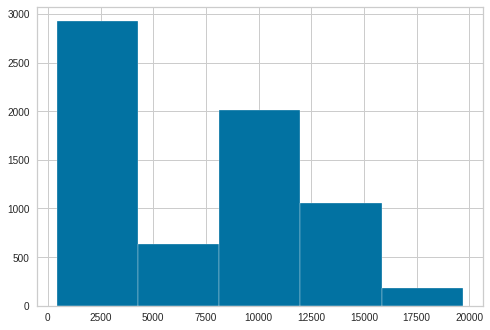

1986


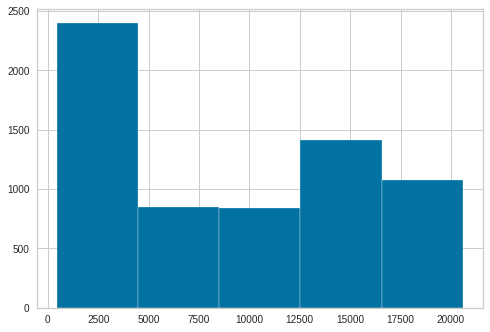

1987


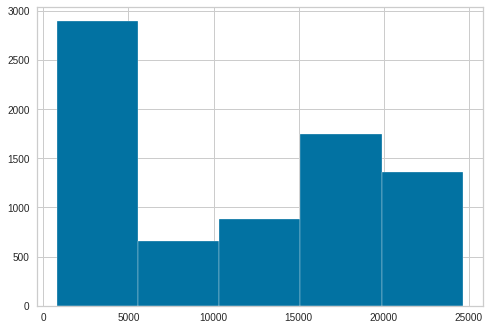

1988


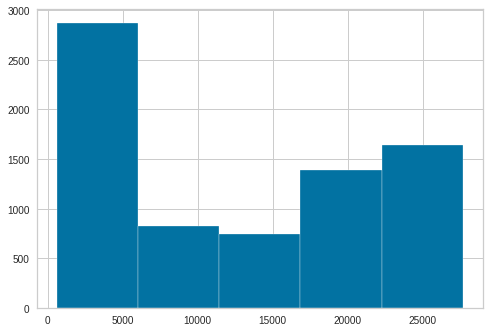

1989


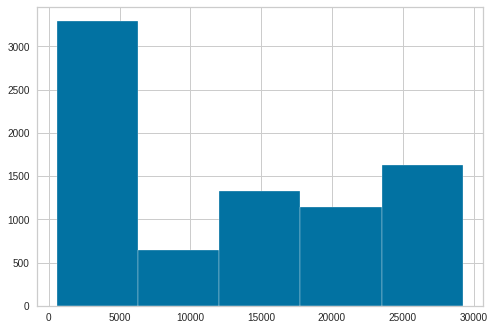

1990


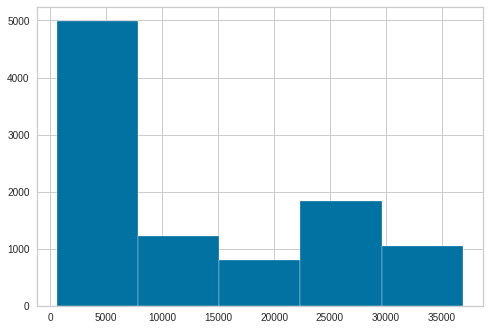

1991


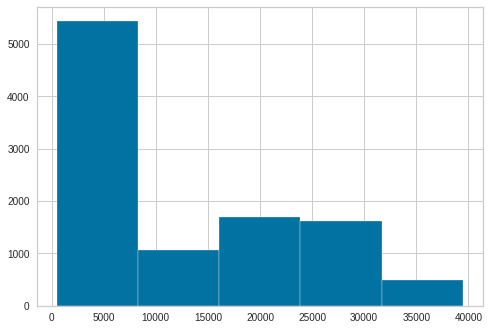

1992


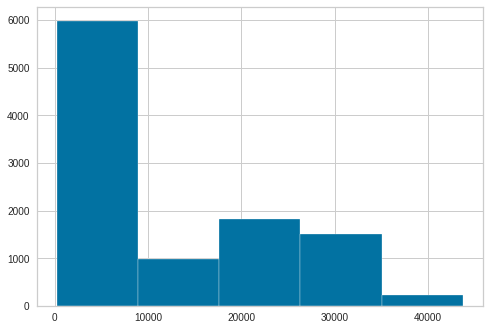

1993


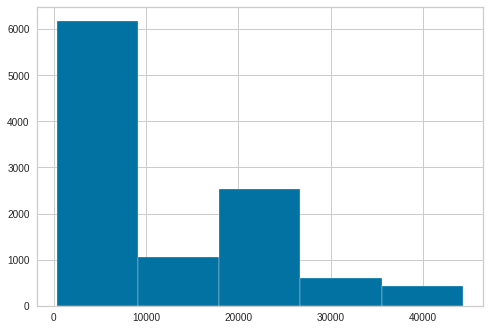

1994


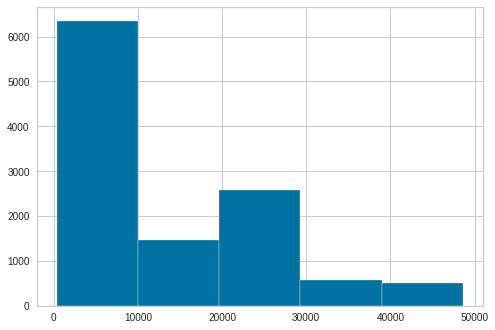

1995


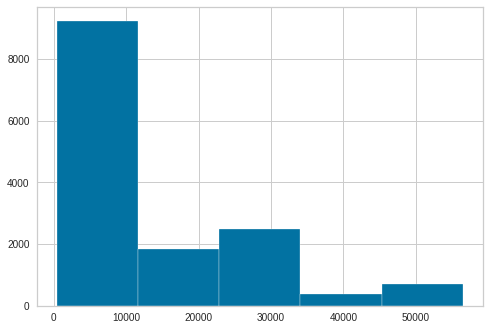

1996


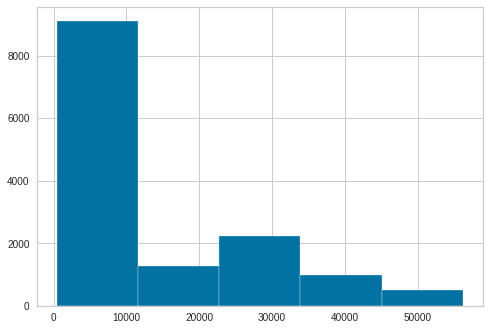

1997


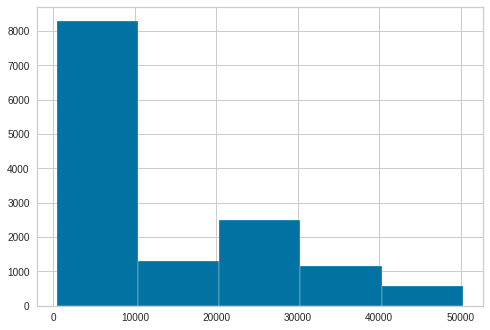

1998


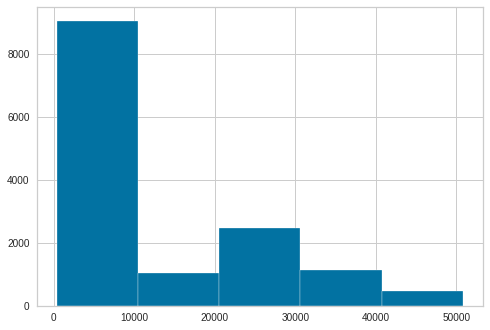

1999


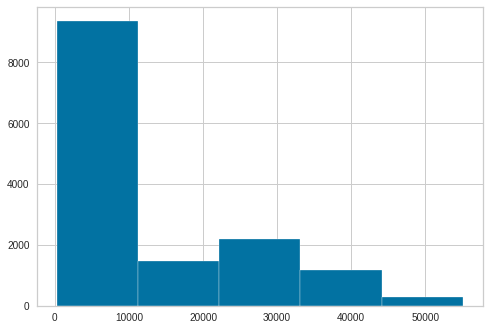

2000


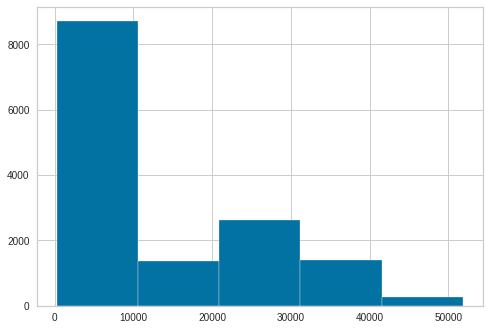

2001


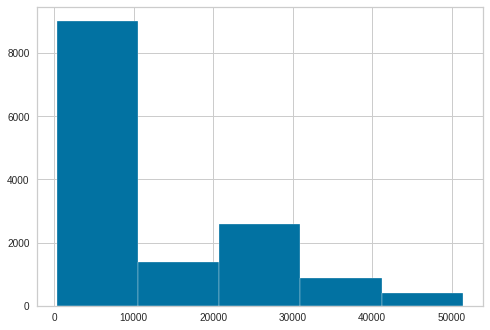

2002


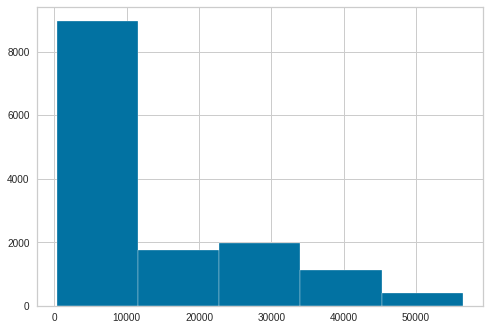

2003


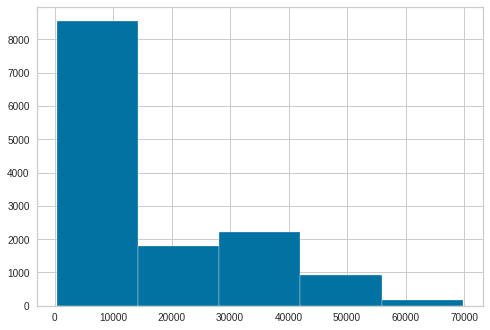

2004


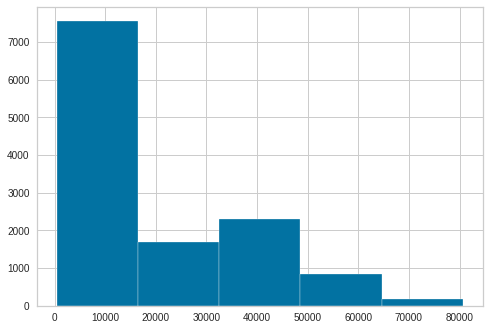

2005


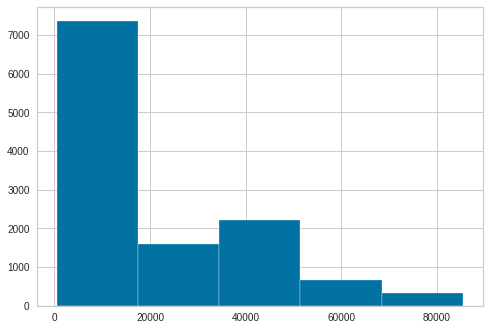

2006


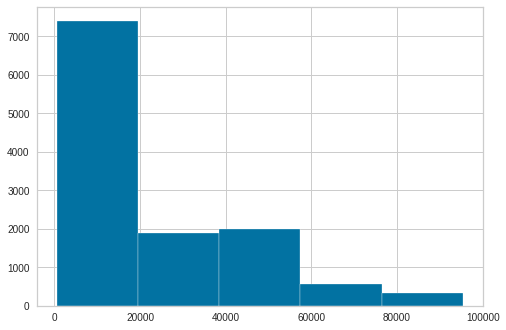

2007


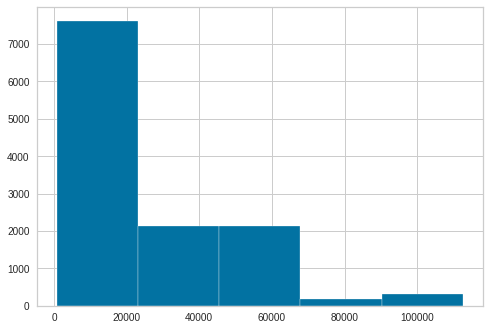

2008


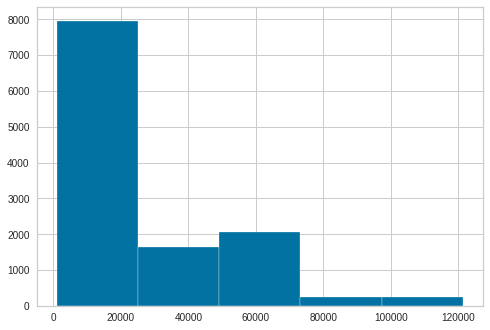

2009


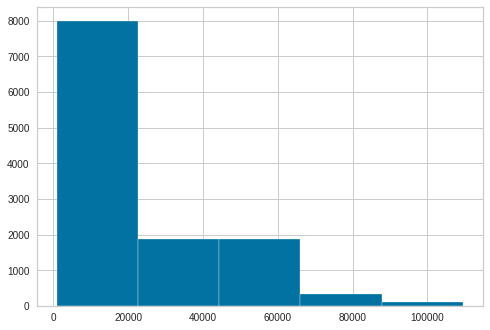

2010


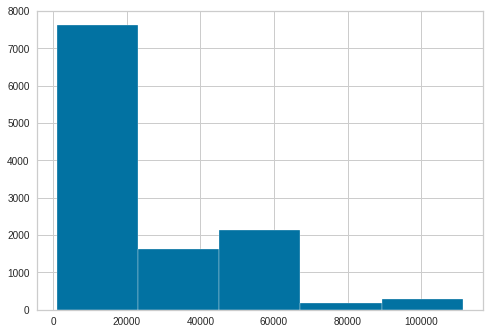

2011


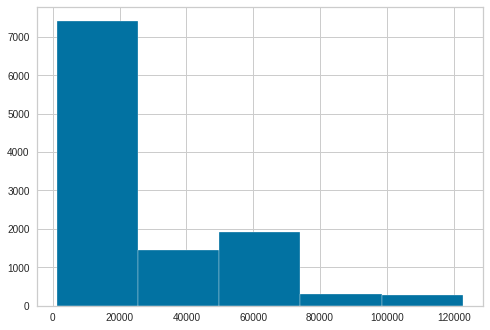

2012


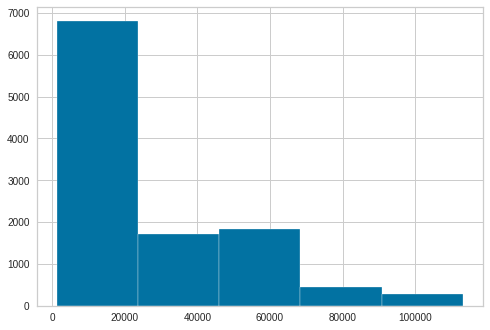

2013


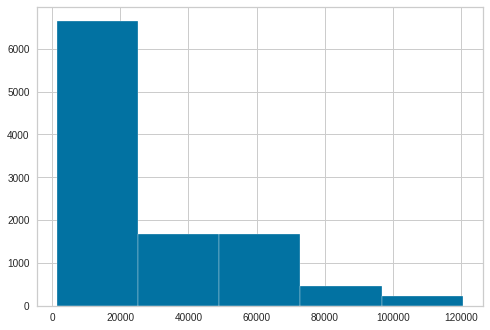

2014


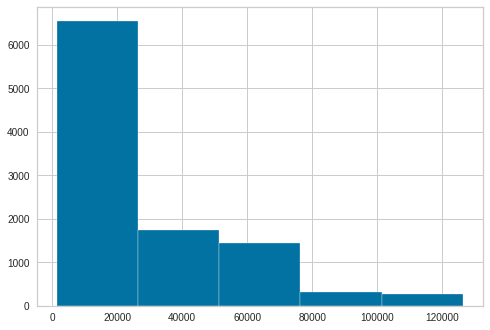

2015


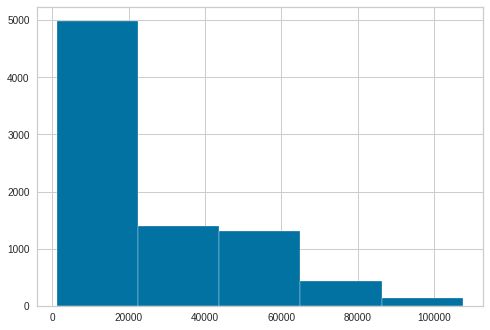

2016


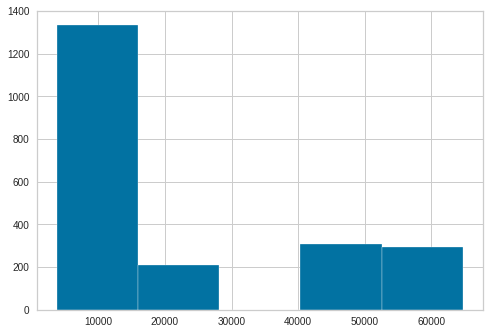

In [0]:
# The distribution of suicides by GDP per capita per years
years = data[:, 1]
objects = sorted(set(years))
y_pos = np.arange(len(objects))
nr = []
for year in objects:
    print(year)
    GDPs = data[(years == year), 10]
    suicides = data[(years == year), 6]
    plt.hist(GDPs, weights = suicides, bins = 5)
    plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0c/CountriesByGDPPerCapitaNominal2018.png/1280px-CountriesByGDPPerCapitaNominal2018.png)

## **Columns redundancy**

In [0]:
df.head()

country  year  ... gdp_per_capita ($)       generation
0  Albania  1987  ...                796     Generation X
1  Albania  1987  ...                796           Silent
2  Albania  1987  ...                796     Generation X
3  Albania  1987  ...                796  G.I. Generation
4  Albania  1987  ...                796          Boomers

[5 rows x 12 columns]

In [0]:
# suicides_no * 100000 / population	== suicides/100k
a = np.divide(data[:, 4] * 100000, data[:, 5])
a = a.astype(float)
a = np.around(a, decimals=2)

print(a.shape - np.sum(a == data[:, 6]))

for i in range(len(data)):
    a = np.divide(data[i, 4] * 100000, data[i, 5])
    a = a.astype(float)
    a = np.around(a, decimals=2)
    if a != data[i, 6]:
        print(data[i])
        print(abs(a - data[i, 6]))

[4]
['Luxembourg' 1989 'male' '55-74 years' 13 32000 40.63 'Luxembourg1989'
 nan '10,391,504,709' 29239 'G.I. Generation']
0.010000000000005116
['Luxembourg' 1991 'male' '15-24 years' 4 25600 15.63 'Luxembourg1991' nan
 '14,321,878,795' 39465 'Generation X']
0.010000000000001563
['Malta' 1996 'male' '75+ years' 1 6400 15.63 'Malta1996' nan
 '3,570,271,558' 10254 'G.I. Generation']
0.010000000000001563
['Puerto Rico' 1990 'female' '35-54 years' 13 416000 3.13
 'Puerto Rico1990' nan '30,603,919,000' 9552 'Silent']
0.009999999999999787


In [0]:
country_years = sorted(set(data[:, 7]))
global_data = [] # macro data about each country per year

for country_year in country_years:
    population = 0 #population per country per year
    suicides = 0 #num of suicides per country per year
    for line in data:
        if line[7] == country_year:
            population += line[5]
            suicides += line[4]

    country = 0
    year = 0
    HDI_for_year = 0
    gdp_for_year = 0
    gdp_per_capita = 0

    for line in data:
        if line[7] == country_year:
            country = line[0]
            year = line[1]
            HDI_for_year = line[8]
            gdp_for_year = line[9]
            gdp_per_capita = line[10]
            break

    global_line = [country, 
                   year,
                   suicides, 
                   population, 
                   country_year, 
                   HDI_for_year, 
                   int(gdp_for_year.replace(',', '')), 
                   gdp_per_capita]
    global_data.append(global_line)

global_data = np.asarray(global_data, dtype=object)

In [0]:
a = np.rint(np.divide(np.asarray(global_data[:, 6], dtype=int),
                      np.asarray(global_data[:, 3], dtype=int))) - np.asarray(global_data[:, 7], dtype=int)
a = np.abs(a) # GDP / (GDP/capita) - population

print(str(np.sum(a > 0) * 100 / a.shape[0]) + '%')

for i in range(len(global_data)):
    a = np.rint(np.divide(np.asarray(global_data[i, 6], dtype=int),
                      np.asarray(global_data[i, 3], dtype=int))) - np.asarray(global_data[i, 7], dtype=int)

    if a != 0:
        print(global_data[i])
        print(a)

0.6893580353295993%
['Armenia' 2016 67 2400033 'Armenia2016' nan 10546135160 3788]
606.0
['Austria' 2016 1201 7484629 'Austria2016' nan 390799991147 46976]
5238.0
['Croatia' 2016 683 3567043 'Croatia2016' nan 51338524831 12905]
1487.0
['Cyprus' 2016 36 711344 'Cyprus2016' nan 20153871681 25098]
3234.0
['Czech Republic' 2016 1318 8929942 'Czech Republic2016' nan 195305084919
 19505]
2366.0
['Grenada' 2016 0 79012 'Grenada2016' nan 1056188593 10838]
2529.0
['Hungary' 2016 1761 8390370 'Hungary2016' nan 125816640421 13448]
1547.0
['Iceland' 2016 40 268773 'Iceland2016' nan 20304098101 64708]
10836.0
['Lithuania' 2016 822 2445296 'Lithuania2016' nan 42773029835 15742]
1750.0
['Mauritius' 2016 98 992432 'Mauritius2016' nan 12232463656 10570]
1756.0
['Mongolia' 2016 423 2167589 'Mongolia2016' nan 11183458131 4145]
1014.0
['Netherlands' 2016 1886 14239554 'Netherlands2016' nan 777227541581 48108]
6474.0
['Qatar' 2016 68 2213121 'Qatar2016' nan 152451923077 62484]
6401.0
['Romania' 2016 1953 1

## **Extrapolates missing values for HDI**
![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/2019_UN_Human_Development_Report.svg/1280px-2019_UN_Human_Development_Report.svg.png)

Albania


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


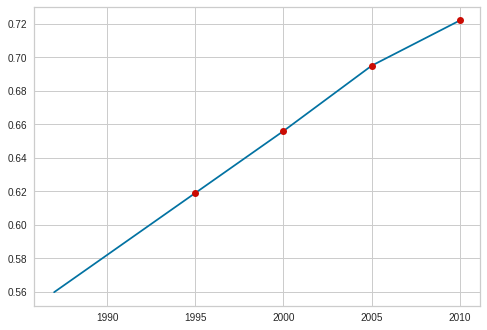

Antigua and Barbuda


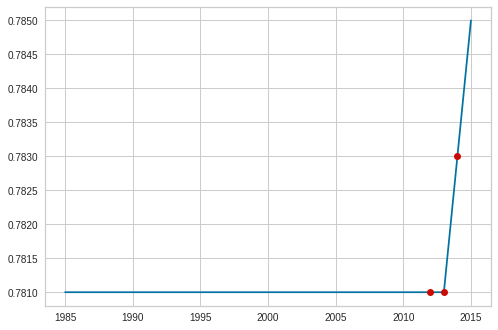

Argentina


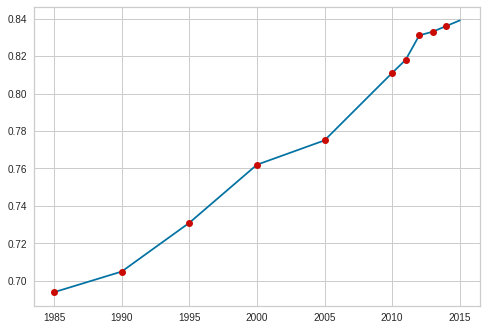

Armenia


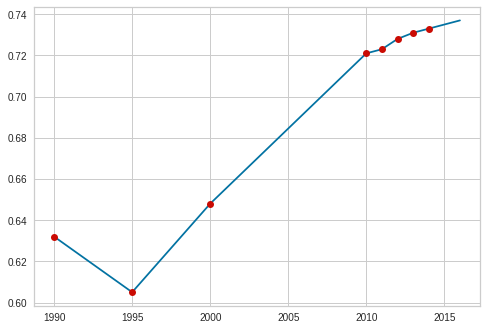

Aruba
[1995 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[0.73642857 0.74965414 0.75296053 0.75825526 0.76355    0.76884474
 0.77413947 0.77943421 0.78232118 0.78520815 0.78809511 0.79098208
 0.79386905 0.79577778]


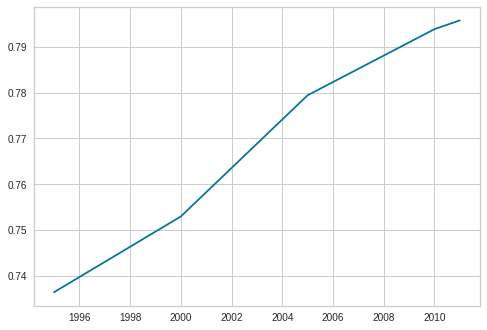

Australia


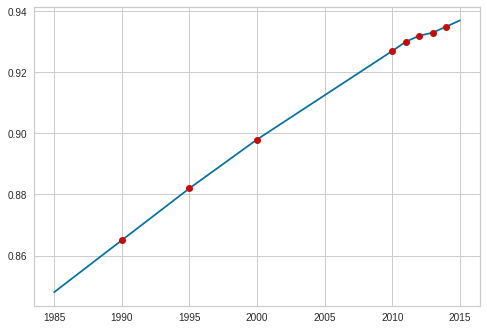

Austria


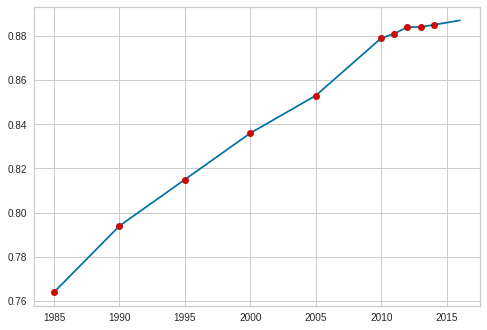

Azerbaijan


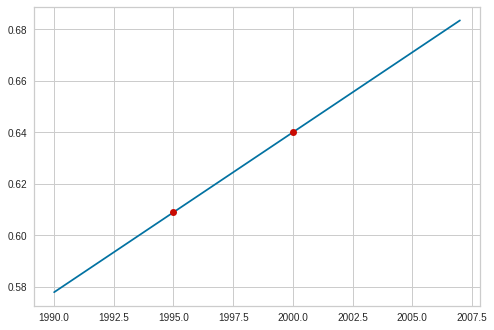

Bahamas


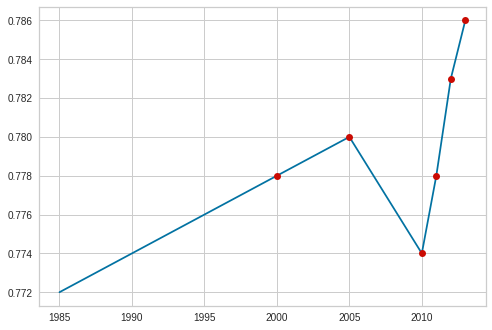

Bahrain


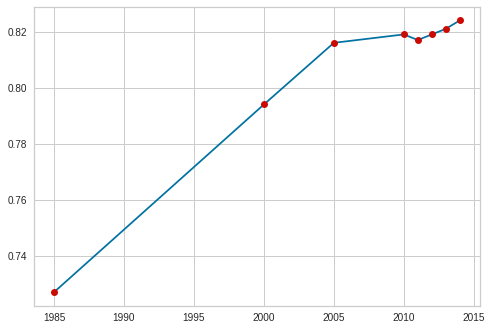

Barbados


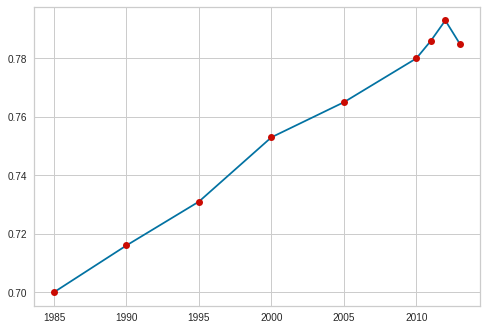

Belarus


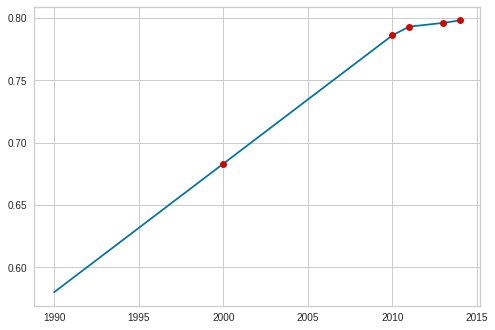

Belgium


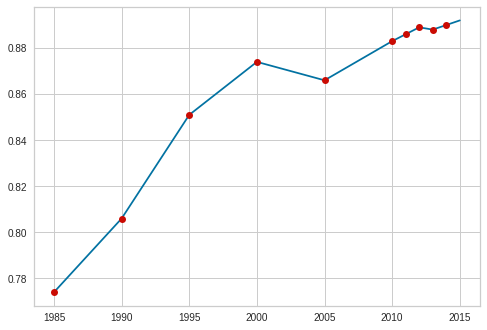

Belize


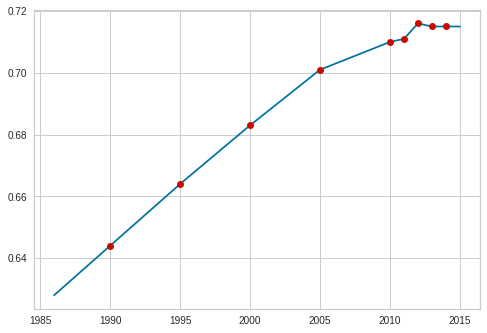

Bosnia and Herzegovina


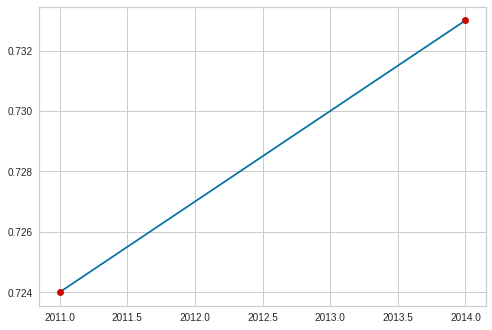

Brazil


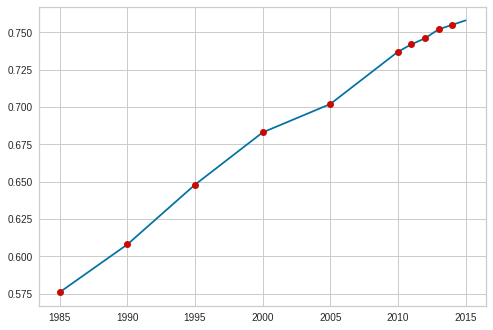

Bulgaria


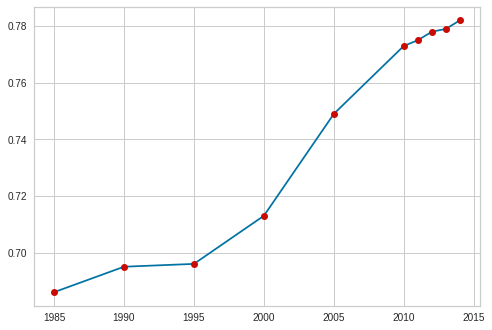

Cabo Verde
[2011]
[nan]
[0.79577778]


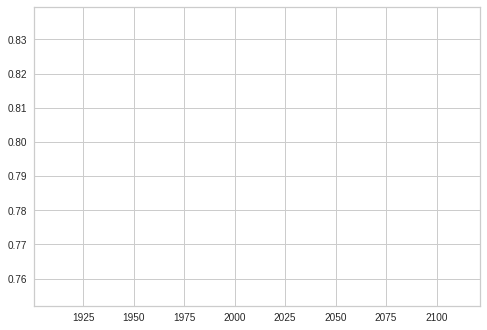

Canada


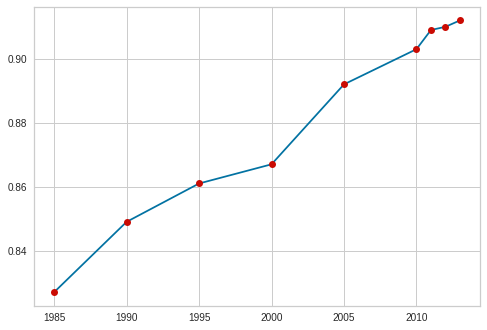

Chile


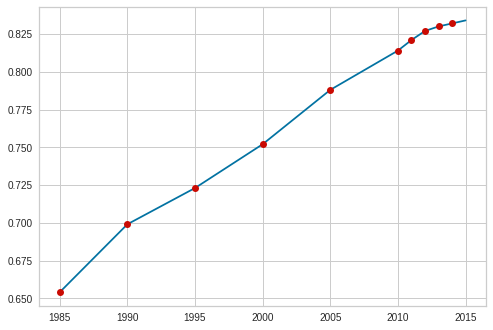

Colombia


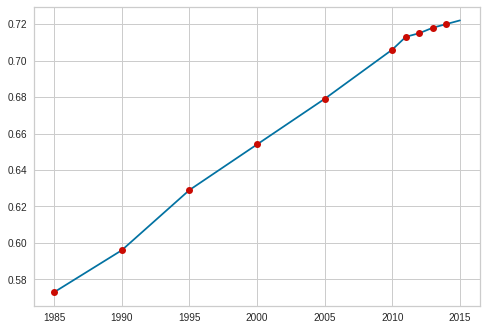

Costa Rica


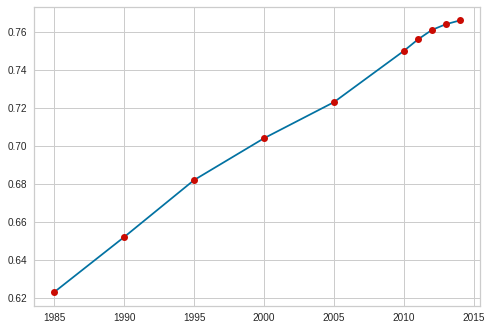

Croatia


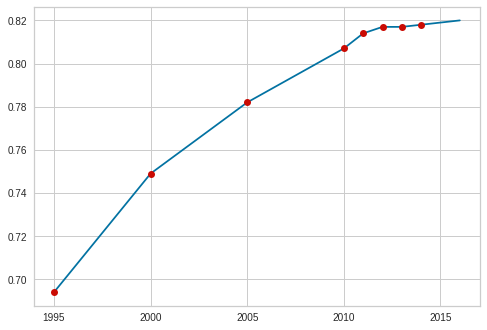

Cuba


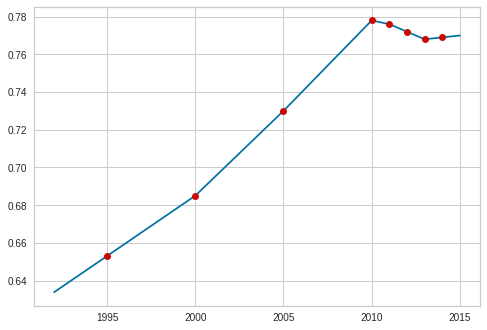

Cyprus


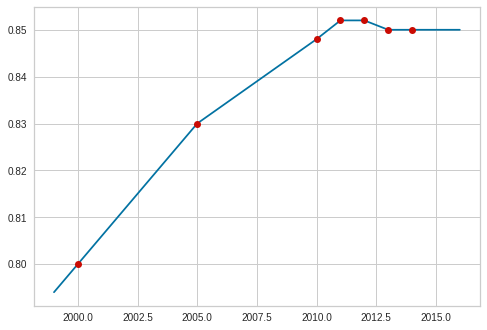

Czech Republic


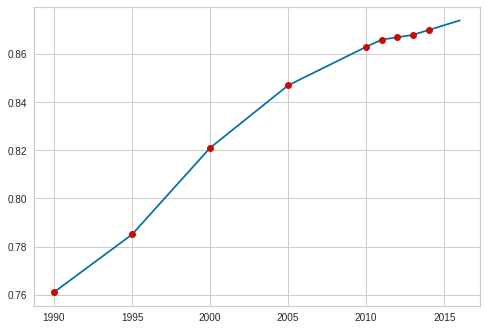

Denmark


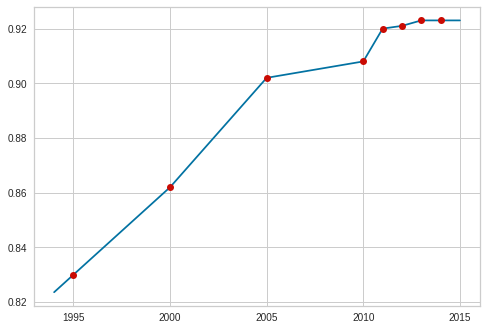

Dominica
[1985]
[nan]
[0.69916216]


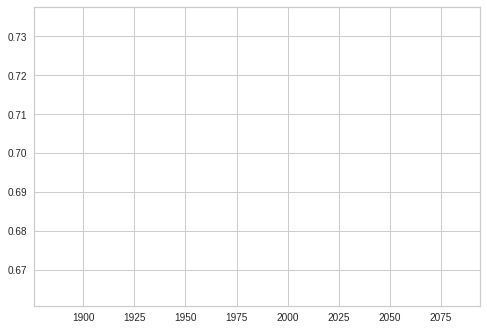

Ecuador


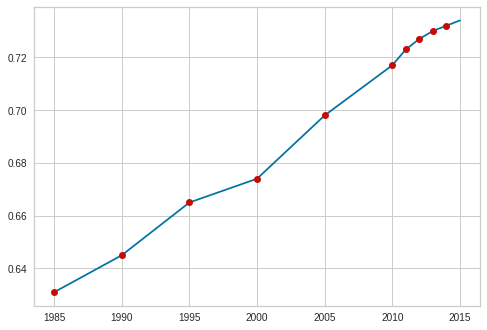

El Salvador


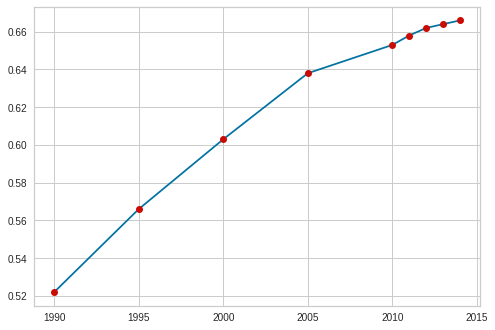

Estonia


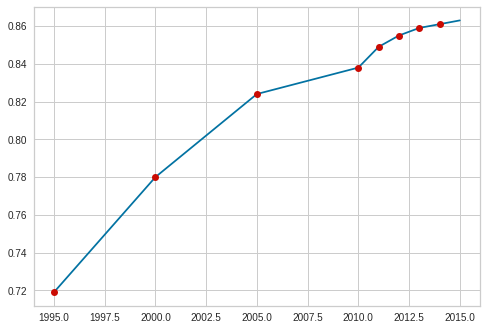

Fiji


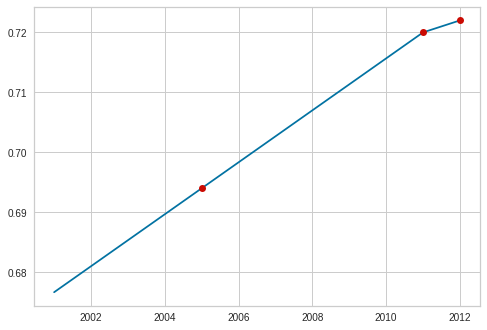

Finland


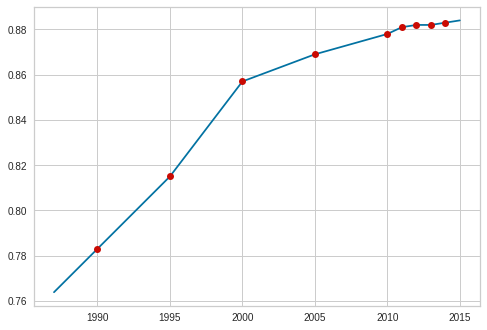

France


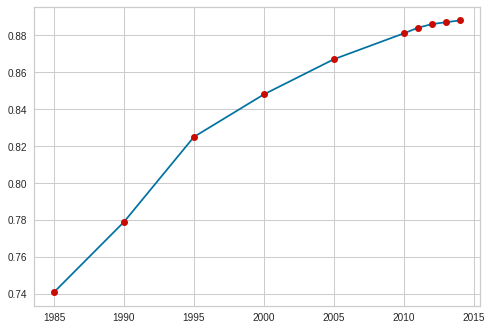

Georgia


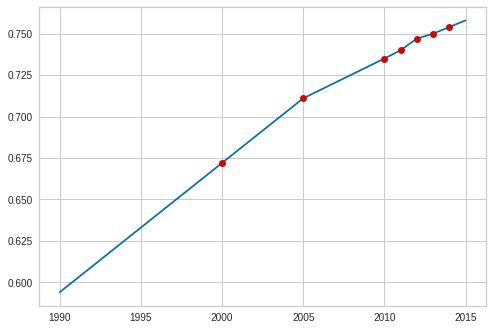

Germany


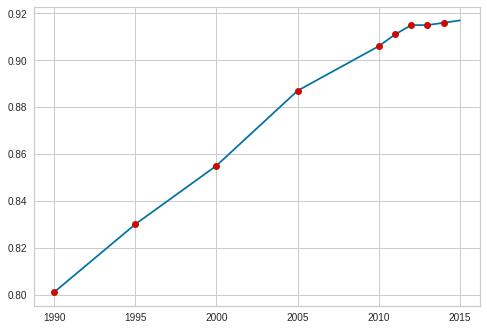

Greece


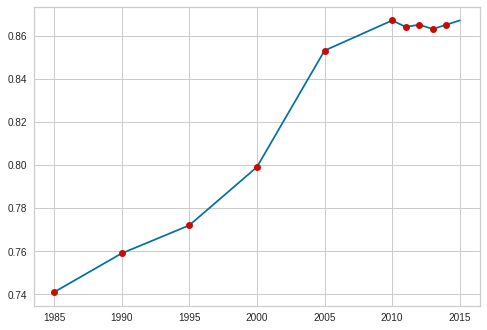

Grenada


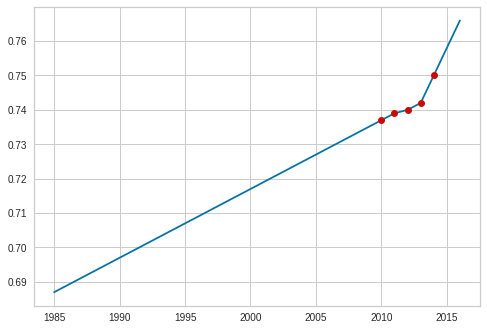

Guatemala


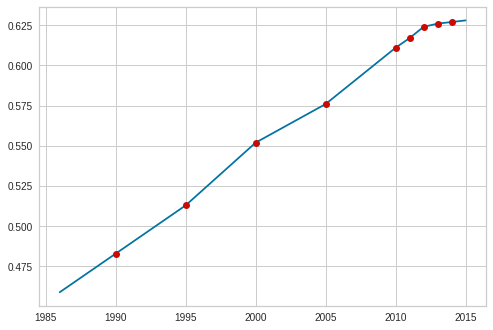

Guyana


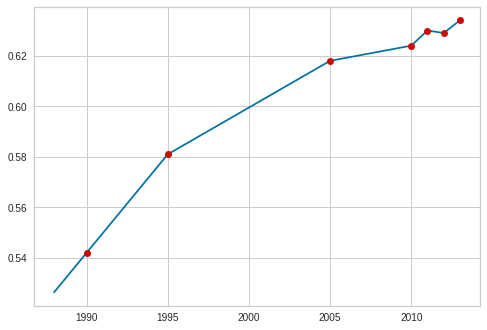

Hungary


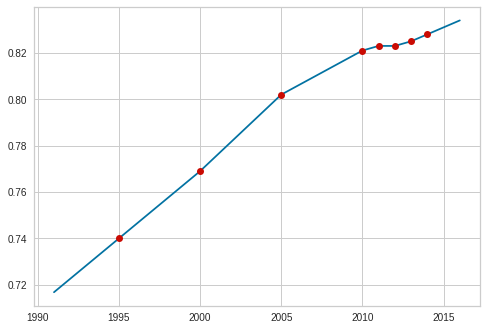

Iceland


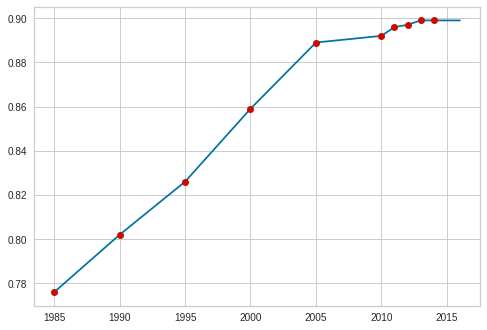

Ireland


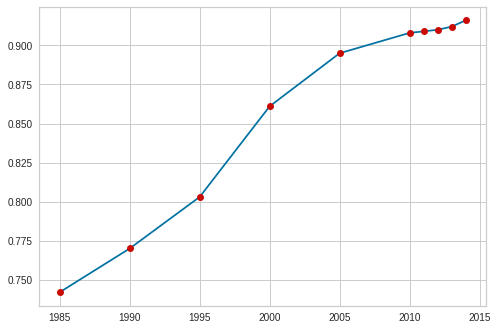

Israel


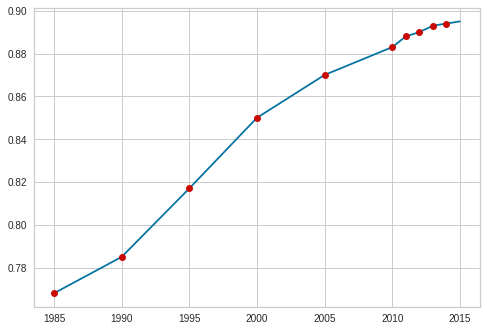

Italy


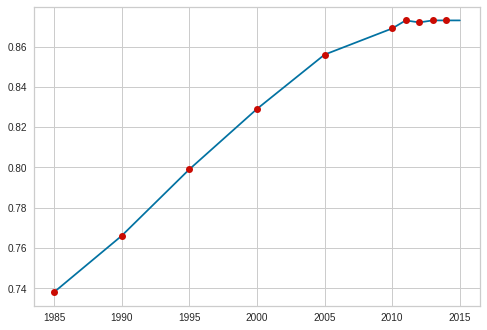

Jamaica


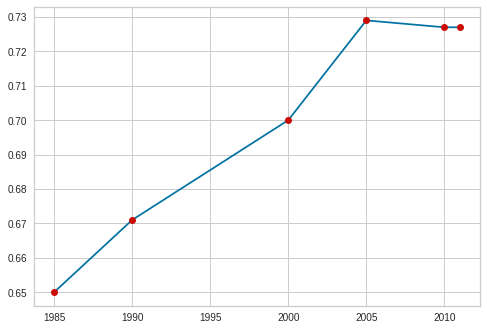

Japan


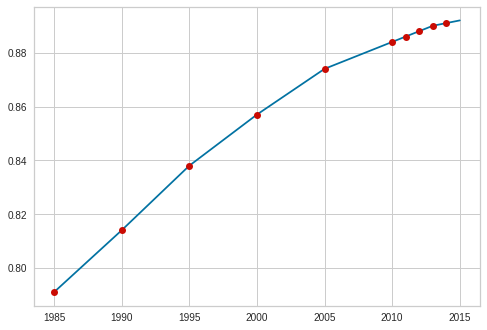

Kazakhstan


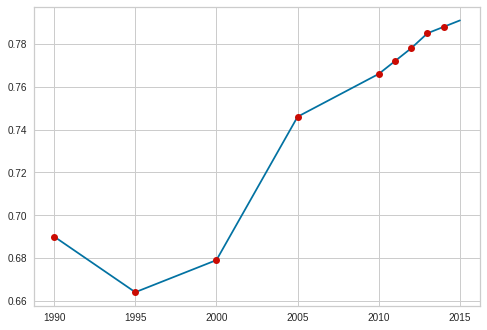

Kiribati
[1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001]
[nan nan nan nan nan nan nan nan nan nan nan]
[0.71992571 0.72405143 0.72817714 0.73230286 0.73642857 0.73973496
 0.74304135 0.74634774 0.74965414 0.75296053 0.75825526]


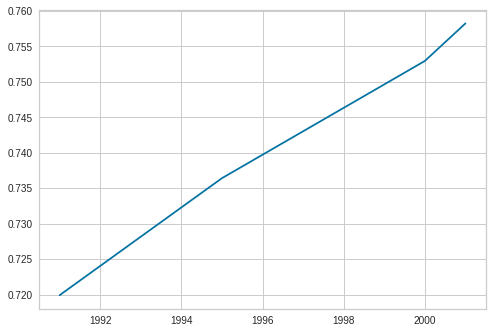

Kuwait


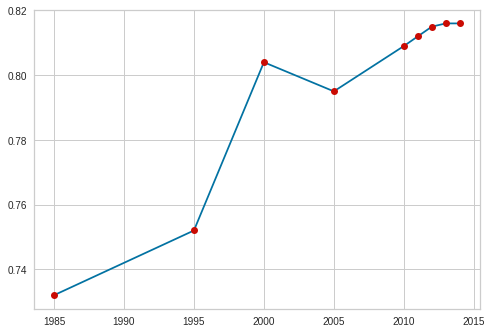

Kyrgyzstan


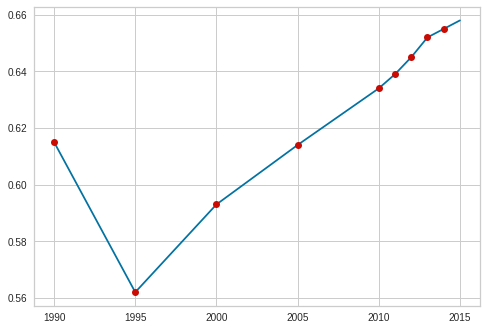

Latvia


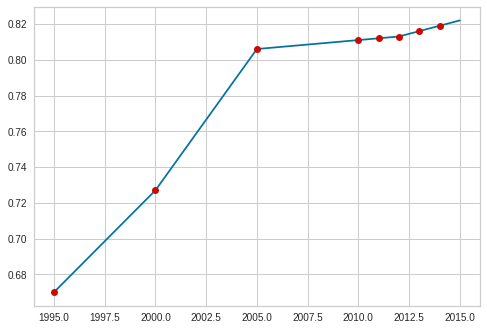

Lithuania


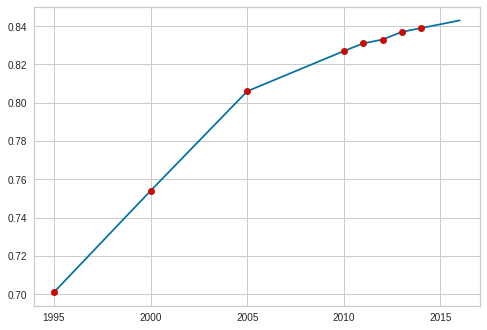

Luxembourg


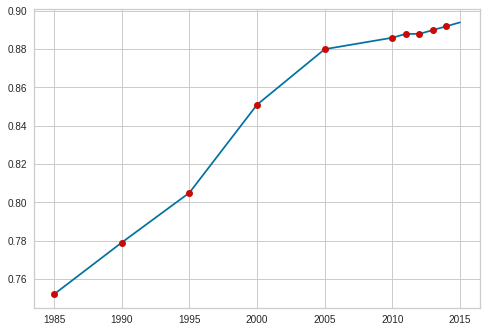

Macau
[1994]
[nan]
[0.73230286]


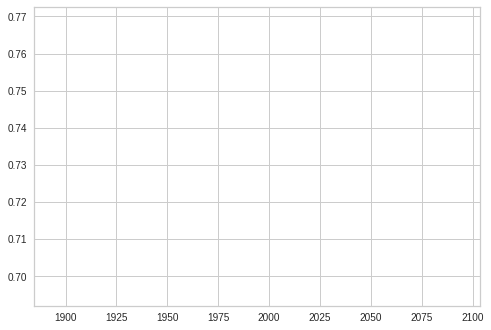

Maldives


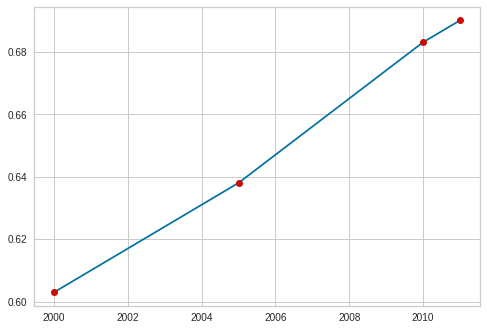

Malta


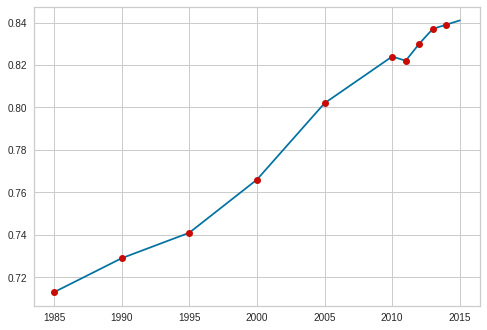

Mauritius


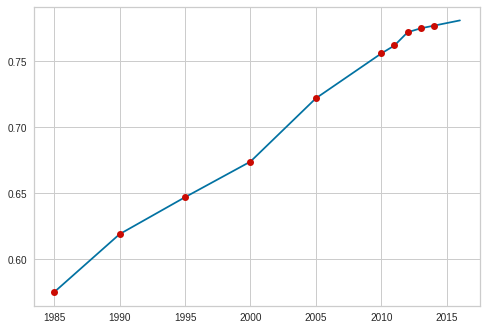

Mexico


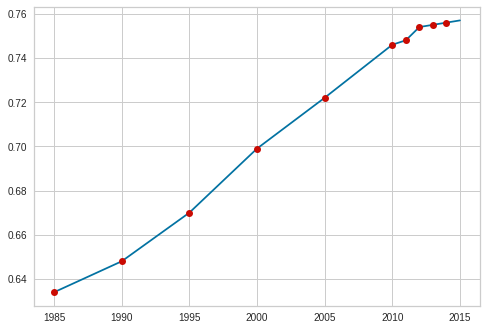

Mongolia
[2016]
[nan]
[0.80893662]


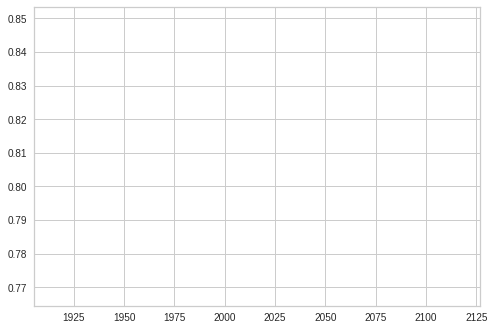

Montenegro
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]
[nan nan nan nan nan 0.75 nan nan nan nan]
[0.72352632 0.72882105 0.73411579 0.73941053 0.74470526 0.75
 0.75288697 0.75577393 0.7586609  0.76154787]


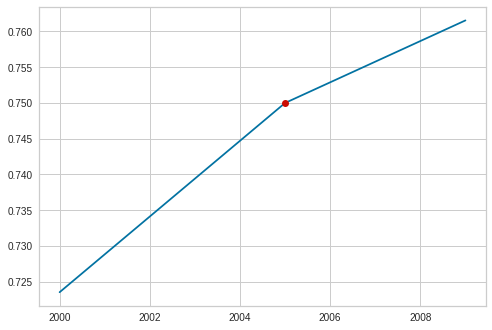

Netherlands


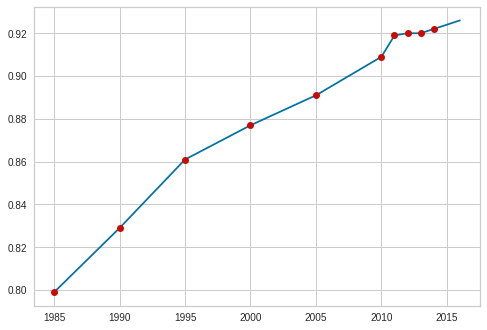

New Zealand


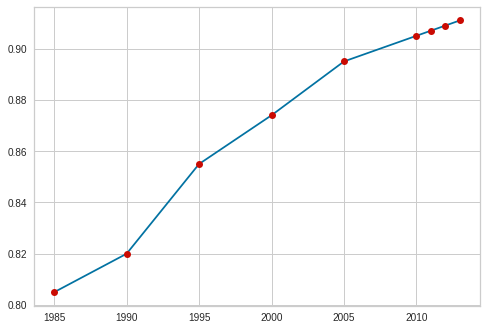

Nicaragua


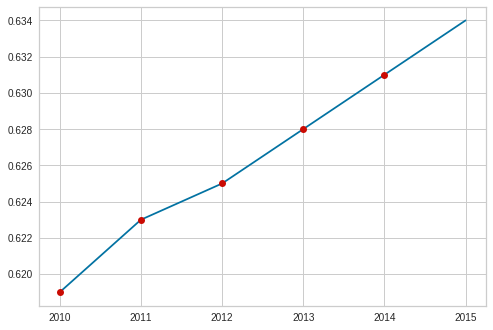

Norway


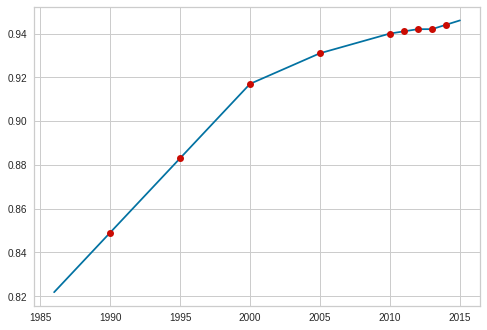

Oman


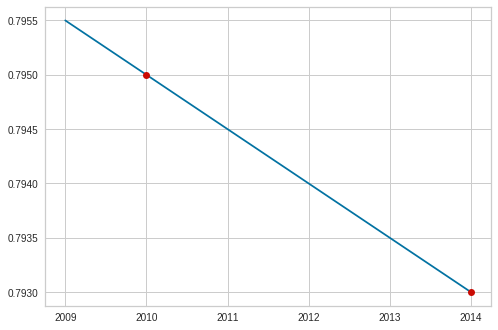

Panama


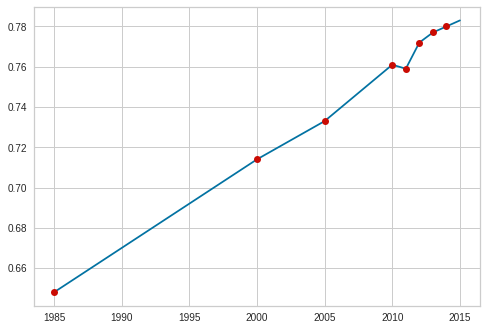

Paraguay


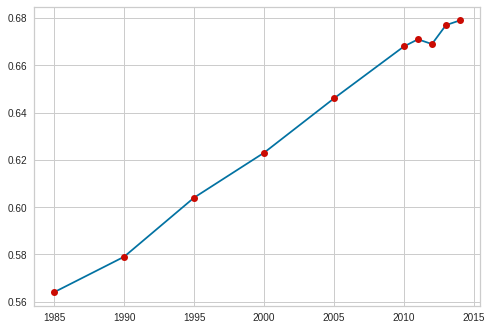

Philippines


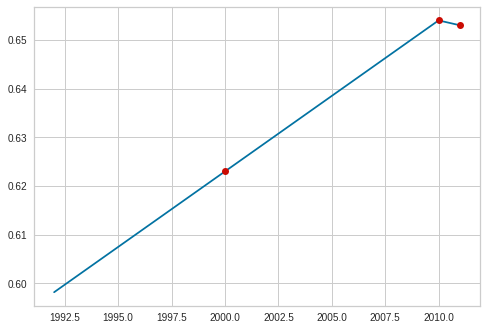

Poland


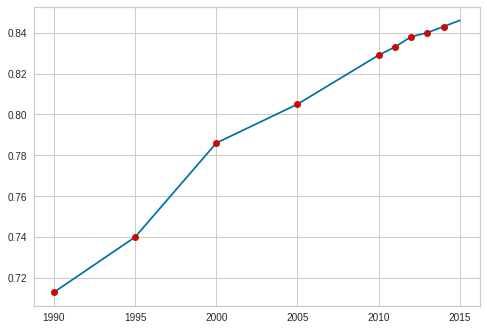

Portugal


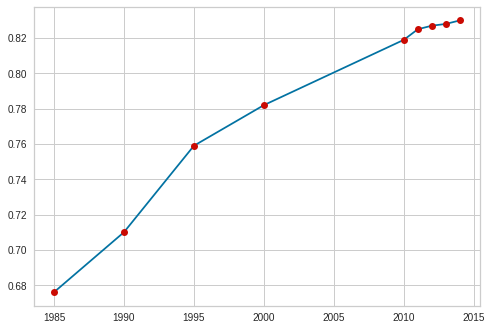

Puerto Rico
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[0.69916216 0.70248973 0.7058173  0.70914486 0.71247243 0.7158
 0.71992571 0.72405143 0.72817714 0.73230286 0.73642857 0.73973496
 0.74304135 0.74634774 0.74965414 0.75296053 0.75825526 0.76355
 0.76884474 0.77413947 0.77943421 0.78232118 0.78520815 0.78809511
 0.79098208 0.79386905 0.79577778 0.80452564 0.80831169 0.80852
 0.80872831]


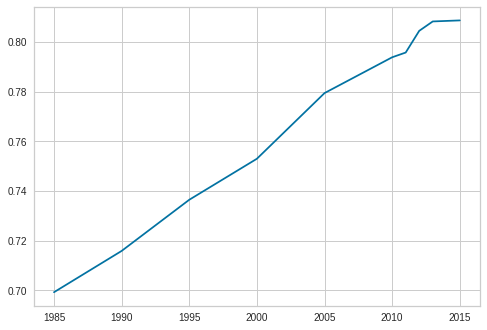

Qatar


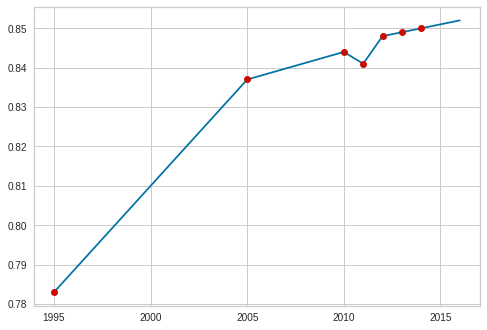

Republic of Korea
[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[0.69916216 0.70248973 0.7058173  0.70914486 0.71247243 0.7158
 0.71992571 0.72405143 0.72817714 0.73230286 0.73642857 0.73973496
 0.74304135 0.74634774 0.74965414 0.75296053 0.75825526 0.76355
 0.76884474 0.77413947 0.77943421 0.78232118 0.78520815 0.78809511
 0.79098208 0.79386905 0.79577778 0.80452564 0.80831169 0.80852
 0.80872831]


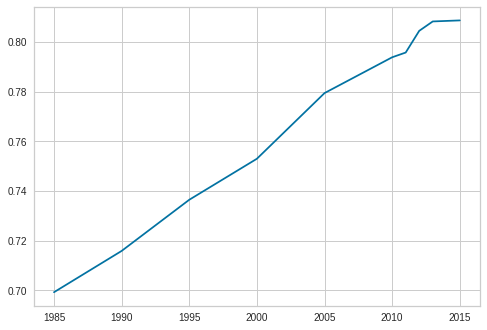

Romania


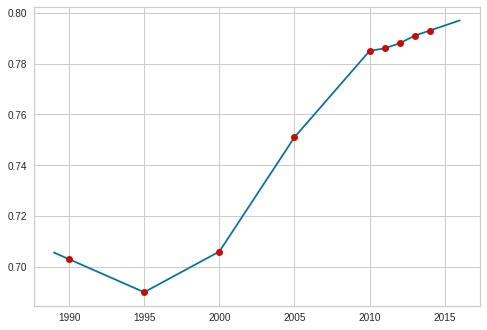

Russian Federation
[1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
[0.71247243 0.7158     0.71992571 0.72405143 0.72817714 0.73230286
 0.73642857 0.73973496 0.74304135 0.74634774 0.74965414 0.75296053
 0.75825526 0.76355    0.76884474 0.77413947 0.77943421 0.78232118
 0.78520815 0.78809511 0.79098208 0.79386905 0.79577778 0.80452564
 0.80831169 0.80852    0.80872831]


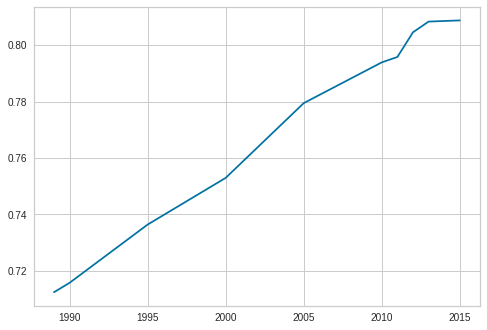

Saint Kitts and Nevis
[1990 1991 1992]
[nan nan nan]
[0.7158     0.71992571 0.72405143]


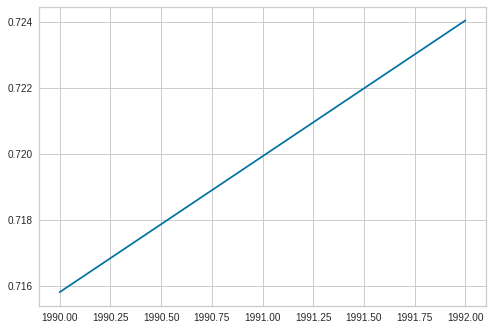

Saint Lucia


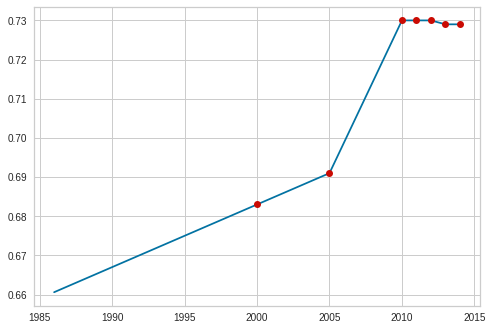

Saint Vincent and Grenadines


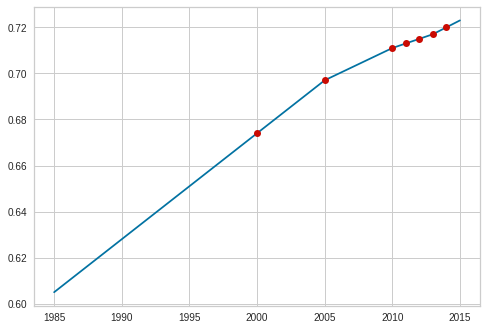

San Marino
[1999 2000 2005]
[nan nan nan]
[0.74965414 0.75296053 0.77943421]


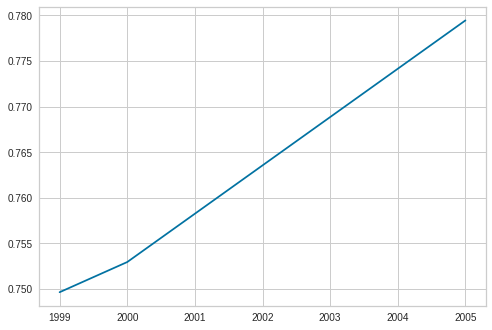

Serbia


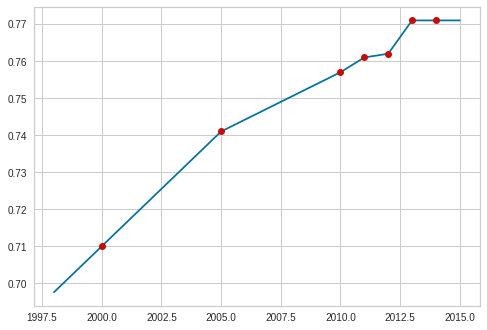

Seychelles


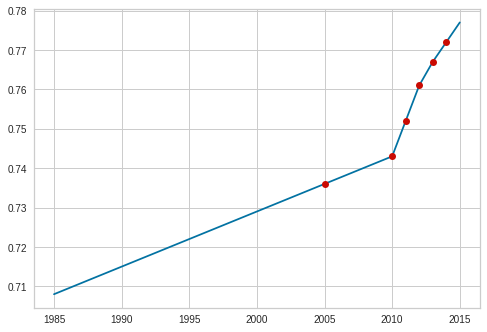

Singapore


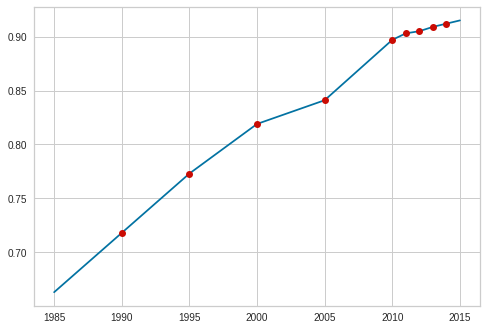

Slovakia


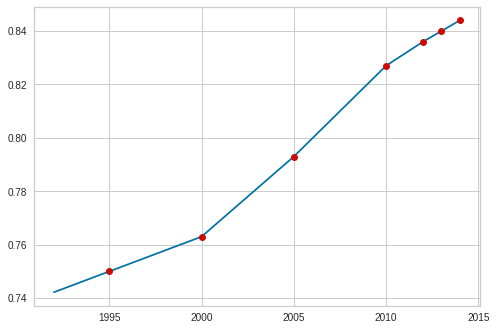

Slovenia


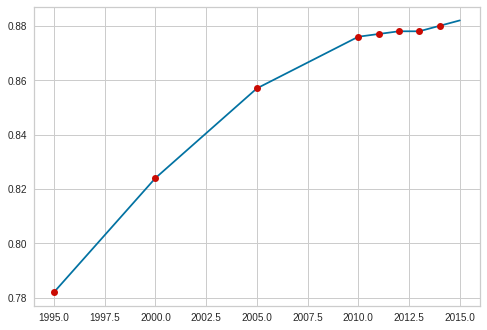

South Africa


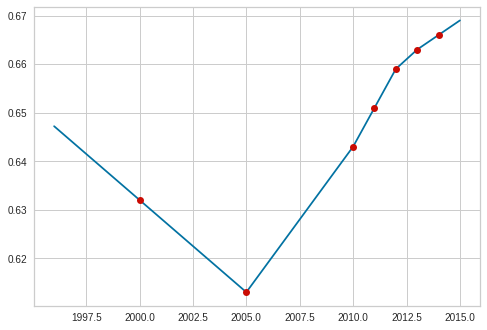

Spain


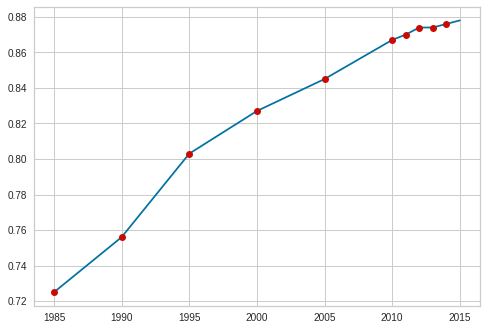

Sri Lanka


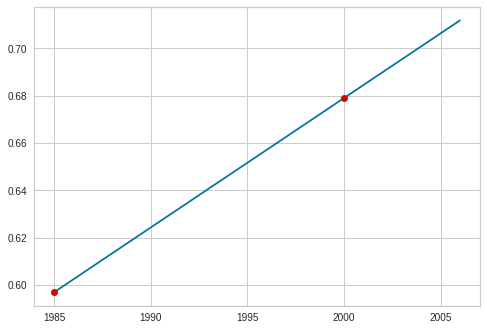

Suriname


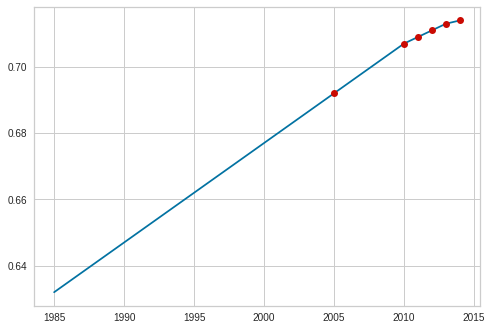

Sweden


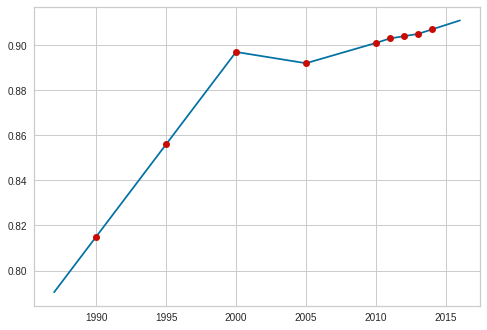

Switzerland


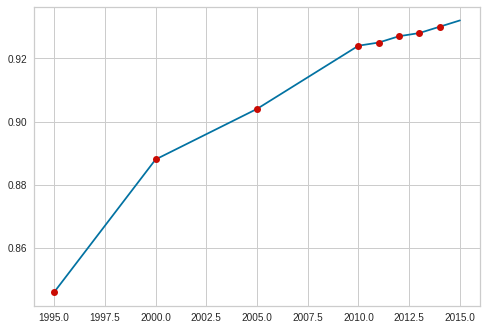

Thailand


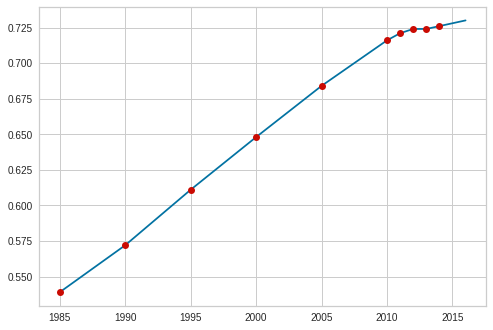

Trinidad and Tobago


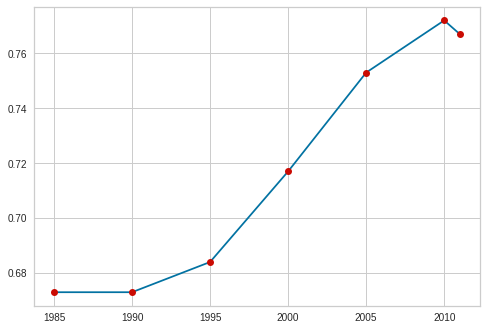

Turkey


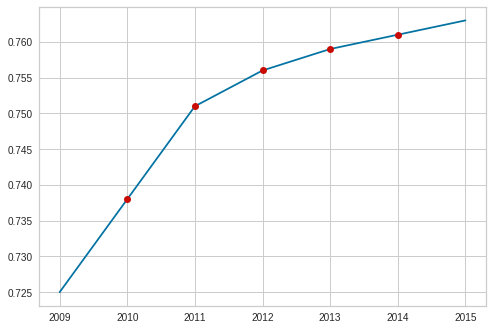

Turkmenistan


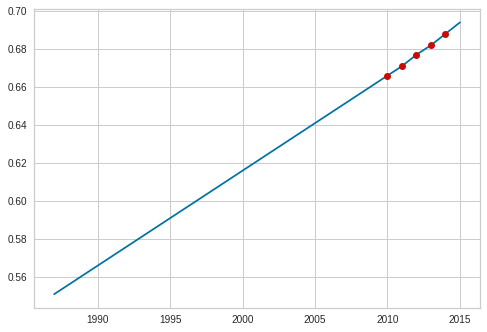

Ukraine


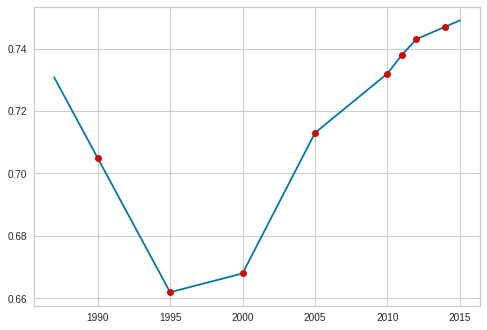

United Arab Emirates


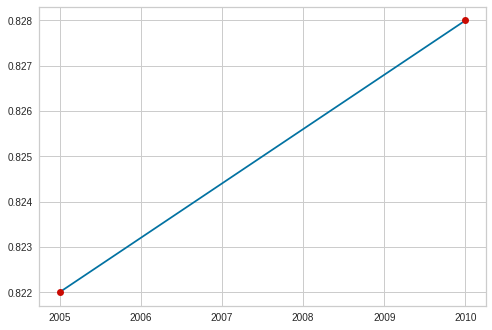

United Kingdom


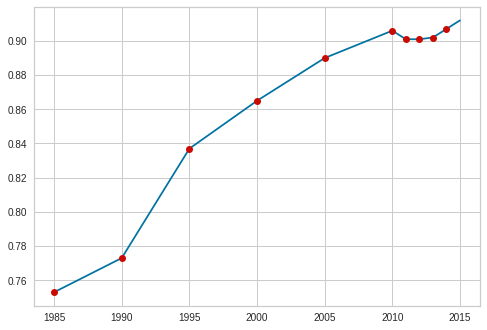

United States


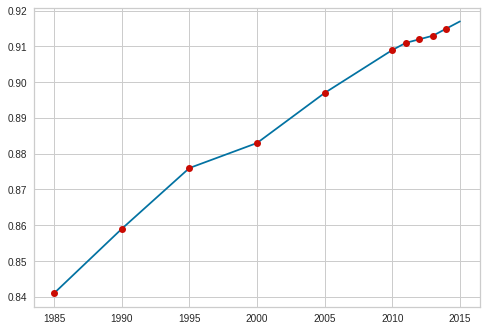

Uruguay


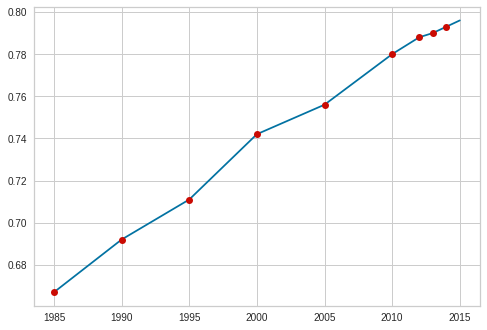

Uzbekistan


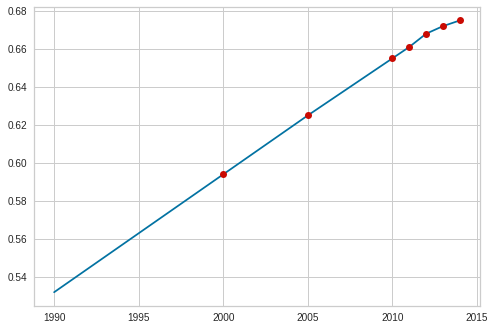

In [0]:
from scipy import interpolate

countries = data[:, 0]
countries = sorted(set(countries))

years = data[:, 1]
years = sorted(set(years))

HDI_for_year_mean = []
global_data_filled = global_data.copy()


for year in years:
    x = global_data[global_data[:, 1] == year,5]
    x = np.array(x, dtype=float)
    x = x[~np.isnan(x)]
    HDI_for_year_mean.append(np.mean(x))

idx_not_nan = np.argwhere(~np.isnan(np.asarray(HDI_for_year_mean, dtype=float)))[:, 0] 
HDIinterp = interpolate.interp1d(np.take(years, idx_not_nan), np.take(HDI_for_year_mean, idx_not_nan), fill_value="extrapolate", kind="linear")
HDI_for_year_mean = HDIinterp(years)

for country in countries:
    print(country)
    x = global_data[global_data[:, 0] == country, 1]
    y = global_data[global_data[:, 0] == country, 5]
    HDI_inferred = []

    idx_not_nan = np.argwhere(~np.isnan(np.asarray(y, dtype=float)))[:, 0] 

    plt.plot()
    if idx_not_nan.shape[0] == 0:
        print(x)
        print(y)
        z = HDI_for_year_mean.take(np.array(x, dtype=int)-1985)
        HDI_inferred = z
        print(z)
        plt.plot(x, z)
    elif idx_not_nan.shape[0] == 1:
        print(x)
        print(y)
        if y[idx_not_nan[0]] < HDI_for_year_mean[x[idx_not_nan[0]]-1985]:
            z = HDI_for_year_mean.take(np.array(x, dtype=int)-1985) - abs(y[idx_not_nan[0]] - HDI_for_year_mean[x[idx_not_nan[0]]-1985])
            HDI_inferred = z
            print(z)
            plt.plot(x, z)
        else:
            z = HDI_for_year_mean.take(np.array(x, dtype=int)-1985) - abs(y[idx_not_nan[0]] + HDI_for_year_mean[x[idx_not_nan[0]]-1985])
            HDI_inferred = z
            print(z)
            plt.plot(x, z)
    else:
        f = interpolate.interp1d(np.take(x, idx_not_nan), np.take(y, idx_not_nan), fill_value="extrapolate", kind="linear")
        z = f(np.array(x, dtype=float))
        HDI_inferred = z
        plt.plot(x, z)
    plt.plot(np.take(x, idx_not_nan), np.take(y, idx_not_nan), 'ro')
    plt.show()

    for year_idx in range(len(x)):
        idx = np.where(np.logical_and(global_data[:, 0] == country, global_data[:, 1] == x[year_idx]))[0][0]
        global_data_filled[idx, 5] = round(HDI_inferred[year_idx], 2)

In [0]:
print(global_data_filled[:50, :])

[['Albania' 1987 73 2709600 'Albania1987' 0.56 2156624900 796]
 ['Albania' 1988 63 2764300 'Albania1988' 0.57 2126000000 769]
 ['Albania' 1989 68 2803100 'Albania1989' 0.57 2335124988 833]
 ['Albania' 1992 47 2822500 'Albania1992' 0.6 709452584 251]
 ['Albania' 1993 73 2807300 'Albania1993' 0.6 1228071038 437]
 ['Albania' 1994 50 2849300 'Albania1994' 0.61 1985673798 697]
 ['Albania' 1995 88 2903400 'Albania1995' 0.62 2424499009 835]
 ['Albania' 1996 89 2940200 'Albania1996' 0.63 3314898292 1127]
 ['Albania' 1997 170 2977300 'Albania1997' 0.63 2359903108 793]
 ['Albania' 1998 154 3012700 'Albania1998' 0.64 2707123772 899]
 ['Albania' 1999 139 3029700 'Albania1999' 0.65 3414760915 1127]
 ['Albania' 2000 54 2796300 'Albania2000' 0.66 3632043908 1299]
 ['Albania' 2001 119 2799349 'Albania2001' 0.66 4060758804 1451]
 ['Albania' 2002 133 2818839 'Albania2002' 0.67 4435078648 1573]
 ['Albania' 2003 124 2843929 'Albania2003' 0.68 5746945913 2021]
 ['Albania' 2004 146 2874991 'Albania2004' 0.6

In [0]:
data_fill = data.copy()

countries = data[:, 0]
countries = sorted(set(countries))

years = data[:, 1]
years = sorted(set(years))

for idx, country_years in enumerate(global_data_filled[:, 4]):
    data_fill[data_fill[:, 7] == country_years, 8] = global_data_filled[idx, 5]
    data_fill[data_fill[:, 7] == country_years, 9] = global_data_filled[idx, 6]

print(data_fill[:50, :])

[['Albania' 1987 'male' '15-24 years' 21 312900 6.71 'Albania1987' 0.56
  2156624900 796 'Generation X']
 ['Albania' 1987 'male' '35-54 years' 16 308000 5.19 'Albania1987' 0.56
  2156624900 796 'Silent']
 ['Albania' 1987 'female' '15-24 years' 14 289700 4.83 'Albania1987' 0.56
  2156624900 796 'Generation X']
 ['Albania' 1987 'male' '75+ years' 1 21800 4.59 'Albania1987' 0.56
  2156624900 796 'G.I. Generation']
 ['Albania' 1987 'male' '25-34 years' 9 274300 3.28 'Albania1987' 0.56
  2156624900 796 'Boomers']
 ['Albania' 1987 'female' '75+ years' 1 35600 2.81 'Albania1987' 0.56
  2156624900 796 'G.I. Generation']
 ['Albania' 1987 'female' '35-54 years' 6 278800 2.15 'Albania1987' 0.56
  2156624900 796 'Silent']
 ['Albania' 1987 'female' '25-34 years' 4 257200 1.56 'Albania1987' 0.56
  2156624900 796 'Boomers']
 ['Albania' 1987 'male' '55-74 years' 1 137500 0.73 'Albania1987' 0.56
  2156624900 796 'G.I. Generation']
 ['Albania' 1987 'female' '5-14 years' 0 311000 0.0 'Albania1987' 0.56
 

1985


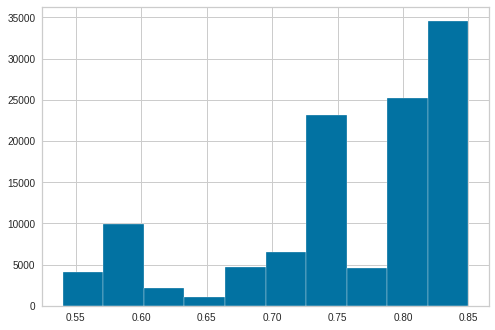

1986


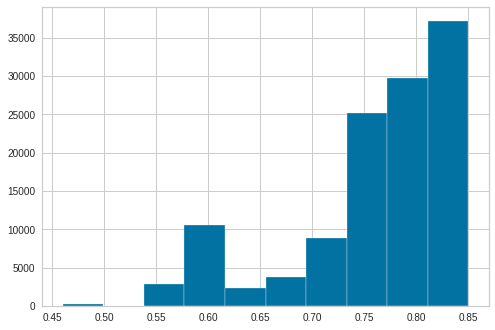

1987


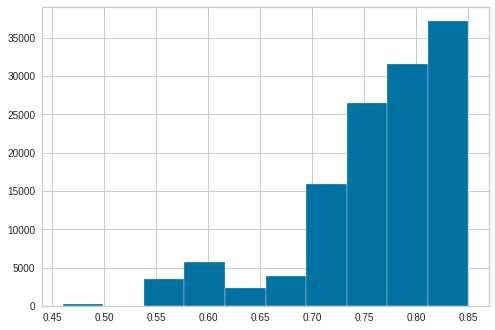

1988


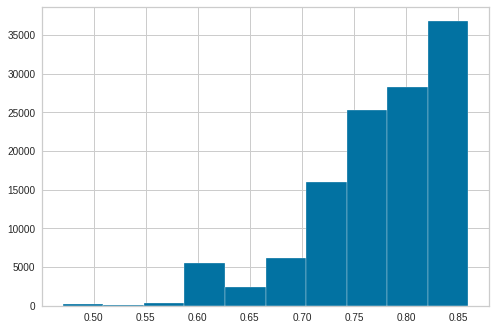

1989


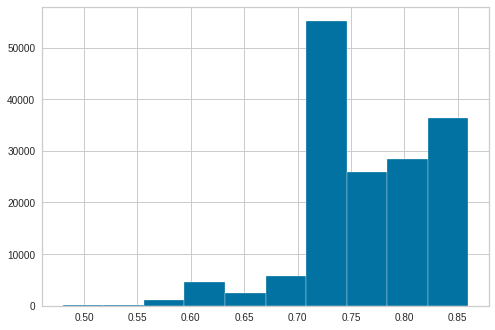

1990


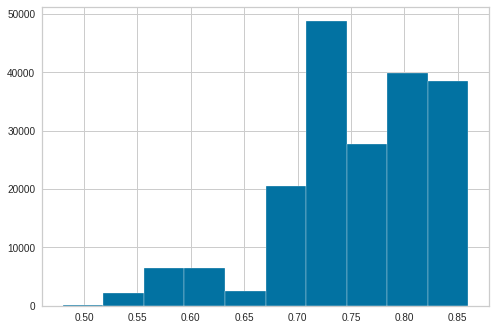

1991


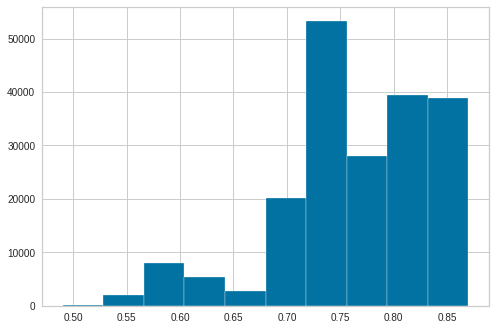

1992


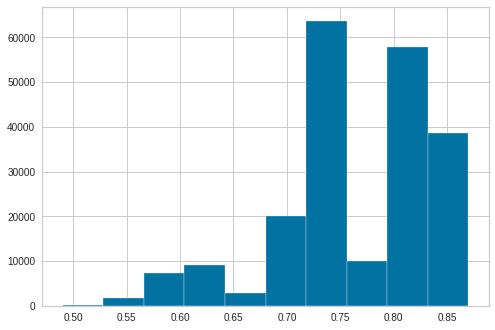

1993


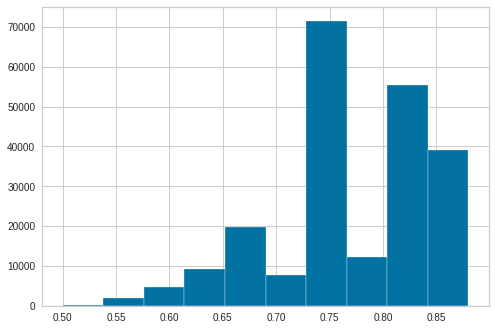

1994


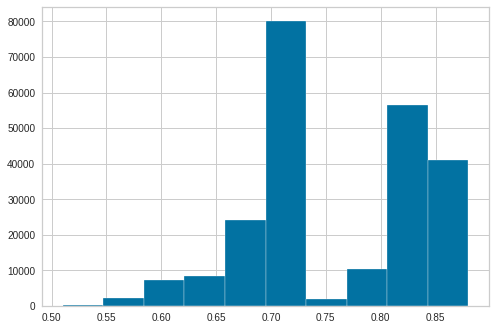

1995


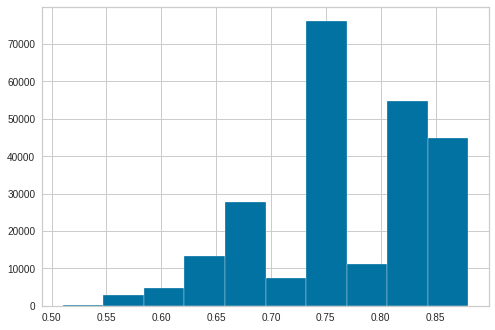

1996


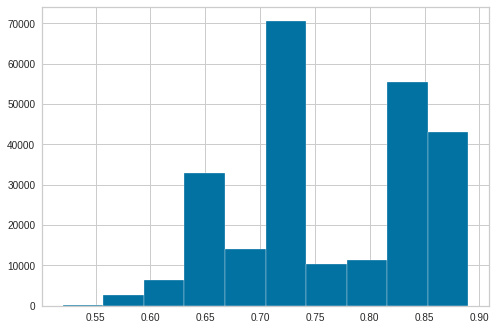

1997


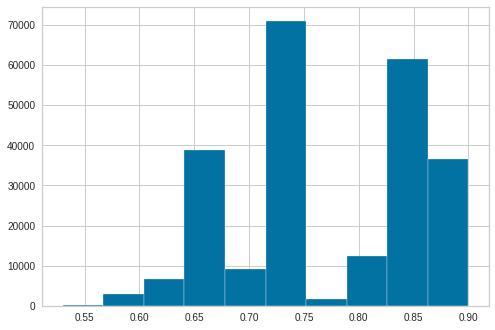

1998


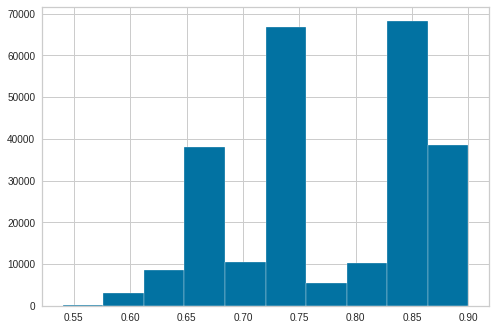

1999


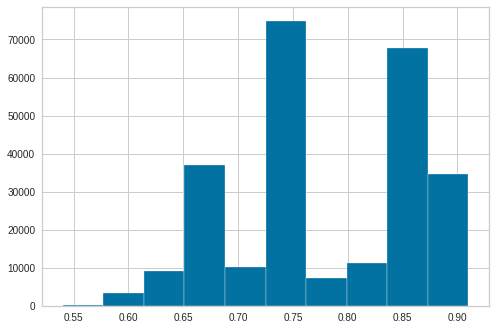

2000


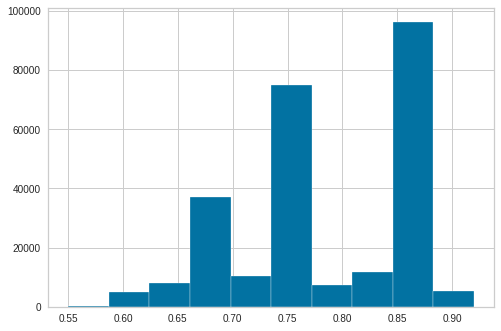

2001


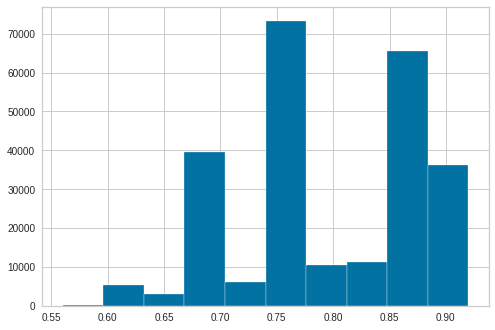

2002


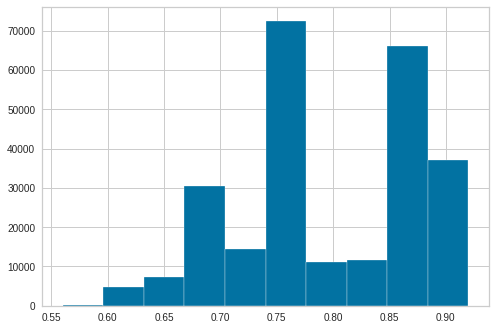

2003


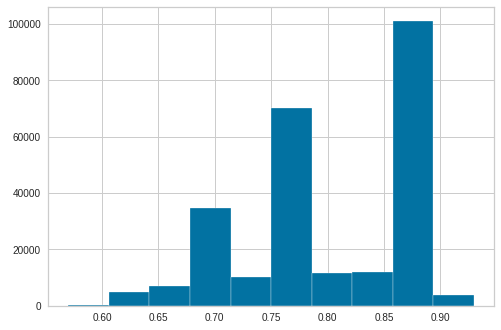

2004


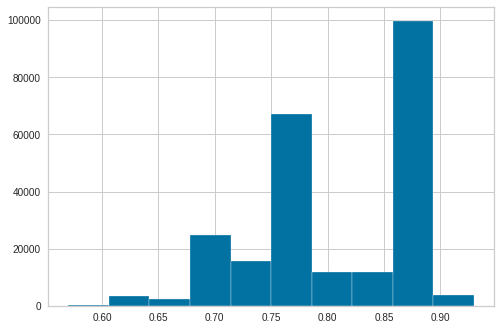

2005


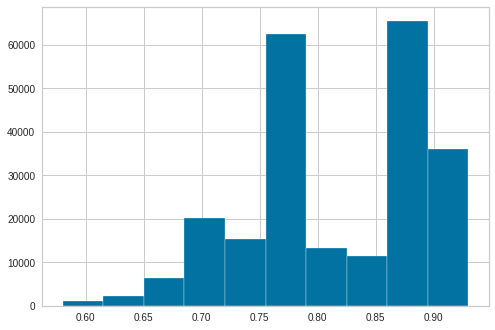

2006


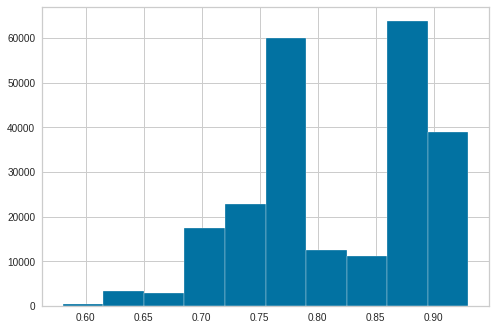

2007


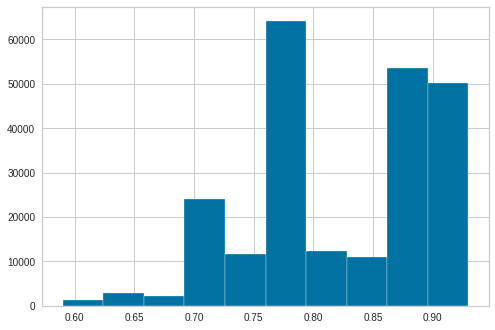

2008


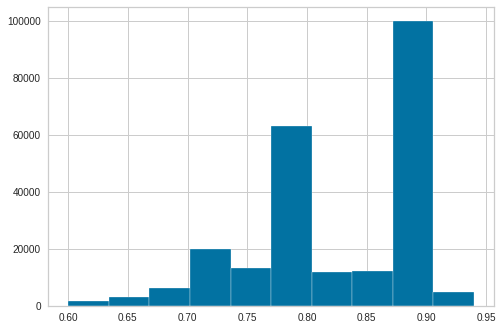

2009


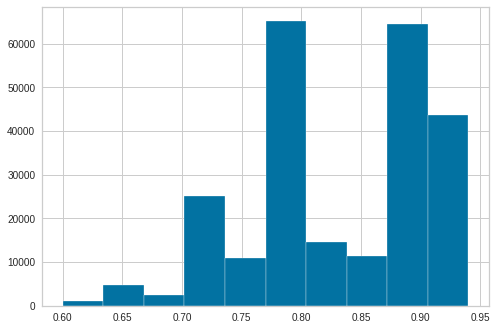

2010


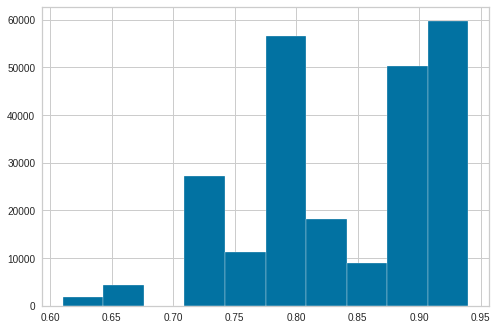

2011


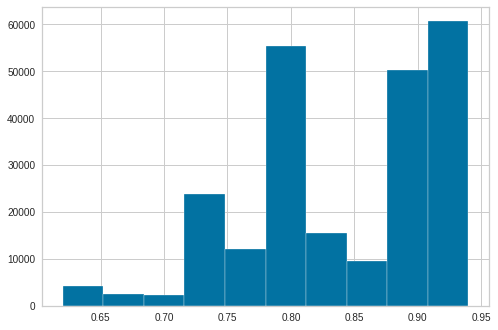

2012


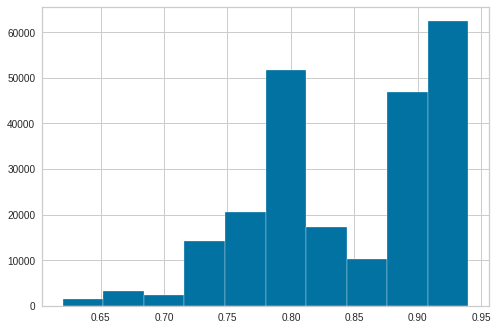

2013


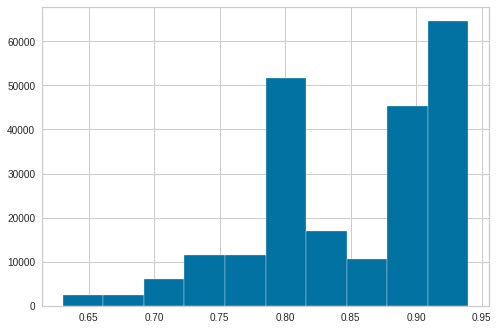

2014


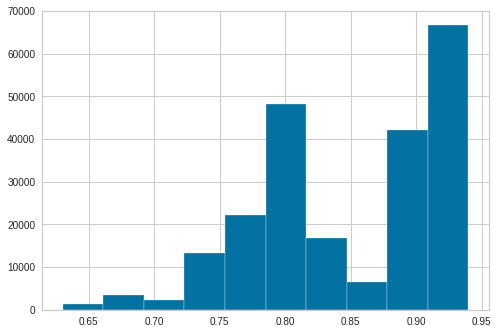

2015


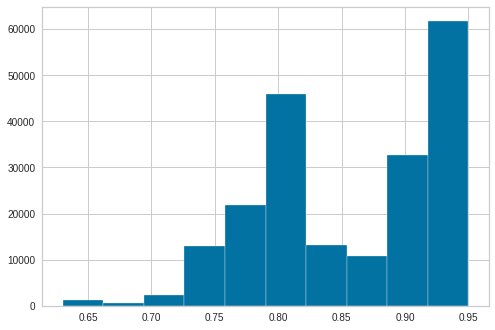

2016


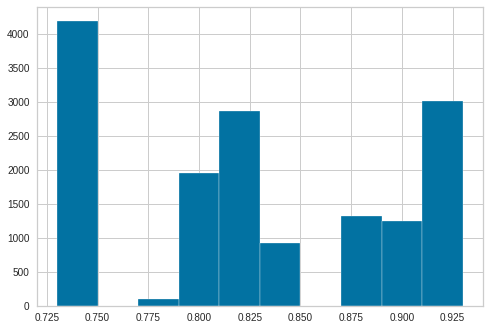

In [0]:
# The distribution of suicides by HDI per years
years = data_fill[:, 1]
objects = sorted(set(years))
y_pos = np.arange(len(objects))
nr = []
for year in objects:
    print(year)
    HDIs = data_fill[(years == year), 8]
    suicides = data_fill[(years == year), 4]
    plt.hist(HDIs, weights = suicides)
    plt.show()

In [0]:
# Creating pandas dataframe from numpy array
columns = df.columns
dataset = pd.DataFrame({columns[i]: data_fill[:, i] for i in range(len(columns))})

In [0]:
dataset

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 12 columns]

In [0]:
# print same iformations about each column for table
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null object
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null object
population            27820 non-null object
suicides/100k pop     27820 non-null object
country-year          27820 non-null object
HDI for year          27820 non-null object
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null object
generation            27820 non-null object
dtypes: object(12)
memory usage: 2.5+ MB
None


In [0]:
dataset.describe()

country   year  ... gdp_per_capita ($)    generation
count     27820  27820  ...              27820         27820
unique      101     32  ...               2233             6
top     Austria   2009  ...               4104  Generation X
freq        382   1068  ...                 36          6408

[4 rows x 12 columns]

.

# **Apriori about suicide rate**

In [0]:
rate_dict = {data_fill[x, 7]: data_fill[x, 6] for x in range(data_fill.shape[0])}
rate = data_fill[:, 6]

print('Min: \t\t' + str(np.amin(rate)))
print('25%: \t\t' + str(np.percentile(rate, 25)))
print('50%: \t\t' + str(np.percentile(rate, 50)))
print('75%: \t\t' + str(np.percentile(rate, 75)))
print('Max: \t\t' + str(np.amax(rate)))
print('Mean : \t\t' + str(np.mean(rate)))
print('Std : \t\t' + str(np.std(rate)))
print('Var : \t\t' + str(np.var(rate)))

Min: 		0.0
25%: 		0.92
50%: 		5.99
75%: 		16.62
Max: 		224.97
Mean : 		12.816097411933894
Std : 		18.961170222241854
Var : 		359.52597619683127


In [0]:
y1 = np.where(rate<np.percentile(rate, 25), 1, 0)
y2 = np.where(np.logical_and(rate>=np.percentile(rate, 25), rate<np.percentile(rate, 50)), 2, 0)
y3 = np.where(np.logical_and(rate>=np.percentile(rate, 50), rate<np.percentile(rate, 75)), 3, 0)
y4 = np.where(rate>=np.percentile(rate, 75), 4, 0)

Y = y1 + y2 + y3 + y4 - 1

print(y1.sum())
print((y2 != 0).sum())
print((y3 != 0).sum())
print((y4 != 0).sum())

6950
6953
6961
6956


In [0]:
dataset2 = dataset.copy()

In [0]:
dataset2

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 12 columns]

In [0]:
# categorical feature
for line in range(dataset2.shape[0]):
    if dataset2['sex'][line] == 'male':
        dataset2['sex'][line] = 0
    else:
        dataset2['sex'][line] = 1

In [0]:
dataset2

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 12 columns]

In [0]:
objects = sorted(set(dataset2['age']))
objects

['15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years']

In [0]:
# ordinal feature
years_dict = {
    '15-24 years' : 0,
    '25-34 years' : 1,
    '35-54 years' : 2,
    '5-14 years' : 3,
    '55-74 years' : 4,
    '75+ years' : 5
}
for line in range(dataset2.shape[0]):
    dataset2['age'][line] = years_dict[dataset2['age'][line]]

In [0]:
dataset2

country  year  ... gdp_per_capita ($)       generation
0         Albania  1987  ...                796     Generation X
1         Albania  1987  ...                796           Silent
2         Albania  1987  ...                796     Generation X
3         Albania  1987  ...                796  G.I. Generation
4         Albania  1987  ...                796          Boomers
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[27820 rows x 12 columns]

In [0]:
objects = sorted(set(dataset2['generation']))
objects

['Boomers',
 'G.I. Generation',
 'Generation X',
 'Generation Z',
 'Millenials',
 'Silent']

In [0]:
# ordinal feature
generation_dict = {
    'Boomers' : 2,         # 1946 - 1964
    'G.I. Generation' : 0, # 1901 - 1927
    'Generation X' : 3,    # 1961 - 1981
    'Generation Z' : 5,    # 1995 - 
    'Millenials' : 4,      # 1981 - 1996
    'Silent' : 1           # 1928 - 1945
}
for line in range(dataset2.shape[0]):
    dataset2['generation'][line] = generation_dict[dataset2['generation'][line]]

In [0]:
dataset2

country  year sex  ...  gdp_for_year ($)  gdp_per_capita ($) generation
0         Albania  1987   0  ...         2156624900                796          3
1         Albania  1987   0  ...         2156624900                796          1
2         Albania  1987   1  ...         2156624900                796          3
3         Albania  1987   0  ...         2156624900                796          0
4         Albania  1987   0  ...         2156624900                796          2
...           ...   ...  ..  ...                ...                ...        ...
27815  Uzbekistan  2014   1  ...        63067077179               2309          3
27816  Uzbekistan  2014   1  ...        63067077179               2309          1
27817  Uzbekistan  2014   0  ...        63067077179               2309          5
27818  Uzbekistan  2014   1  ...        63067077179               2309          5
27819  Uzbekistan  2014   1  ...        63067077179               2309          2

[27820 rows x 12 columns]

In [0]:
dataset2.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [0]:
dataset3 = dataset2.drop(columns=['suicides_no', 'population', 'country-year', ' gdp_for_year ($) '])

In [0]:
dataset3

country  year sex  ... HDI for year gdp_per_capita ($) generation
0         Albania  1987   0  ...         0.56                796          3
1         Albania  1987   0  ...         0.56                796          1
2         Albania  1987   1  ...         0.56                796          3
3         Albania  1987   0  ...         0.56                796          0
4         Albania  1987   0  ...         0.56                796          2
...           ...   ...  ..  ...          ...                ...        ...
27815  Uzbekistan  2014   1  ...         0.68               2309          3
27816  Uzbekistan  2014   1  ...         0.68               2309          1
27817  Uzbekistan  2014   0  ...         0.68               2309          5
27818  Uzbekistan  2014   1  ...         0.68               2309          5
27819  Uzbekistan  2014   1  ...         0.68               2309          2

[27820 rows x 8 columns]

In [0]:
columns3 = dataset3.columns
columns3 = list(columns3)

In [0]:
dataset4 = pd.get_dummies(dataset3, columns=['country'])

In [0]:
dataset4

year sex age  ... country_United States country_Uruguay country_Uzbekistan
0      1987   0   0  ...                     0               0                  0
1      1987   0   2  ...                     0               0                  0
2      1987   1   0  ...                     0               0                  0
3      1987   0   5  ...                     0               0                  0
4      1987   0   1  ...                     0               0                  0
...     ...  ..  ..  ...                   ...             ...                ...
27815  2014   1   2  ...                     0               0                  1
27816  2014   1   5  ...                     0               0                  1
27817  2014   0   3  ...                     0               0                  1
27818  2014   1   3  ...                     0               0                  1
27819  2014   1   4  ...                     0               0                  1

[27820 rows x 108 columns]

In [0]:
dataset4.insert(0, 'country', dataset3['country'][:])

In [0]:
dataset4

country  year  ... country_Uruguay country_Uzbekistan
0         Albania  1987  ...               0                  0
1         Albania  1987  ...               0                  0
2         Albania  1987  ...               0                  0
3         Albania  1987  ...               0                  0
4         Albania  1987  ...               0                  0
...           ...   ...  ...             ...                ...
27815  Uzbekistan  2014  ...               0                  1
27816  Uzbekistan  2014  ...               0                  1
27817  Uzbekistan  2014  ...               0                  1
27818  Uzbekistan  2014  ...               0                  1
27819  Uzbekistan  2014  ...               0                  1

[27820 rows x 109 columns]

In [0]:
X = dataset4.to_numpy()

### **Imports**

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns; sns.set(style='white')

from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
rcParams['figure.figsize'] = 12, 12

### **Utility plotting functions**

In [0]:
COLORS = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']
MARKERS = ['o', 'v', 's', '<', '>', '8', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot2d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    
    if mode is not None:
        transformer = mode(n_components=2)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 2, 'plot2d only works with 2-dimensional data'


    plt.grid()
    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        plt.plot(ix[0], ix[1], 
                    c=COLORS[iyp], 
                    marker=MARKERS[iyt])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            plt.plot(cx[0], cx[1], 
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')

    plt.show()

def plot3d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    if mode is not None:
        transformer = mode(n_components=3)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 3, 'plot2d only works with 3-dimensional data'

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.elev = 30
    ax.azim = 120

    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        ax.plot(xs=[ix[0]], ys=[ix[1]], zs=[ix[2]], zdir='z',
                    c=COLORS[iyp], 
                    marker=MARKERS[iyt])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            ax.plot(xs=[cx[0]], ys=[cx[1]], zs=[cx[2]], zdir='z',
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')
    plt.show()

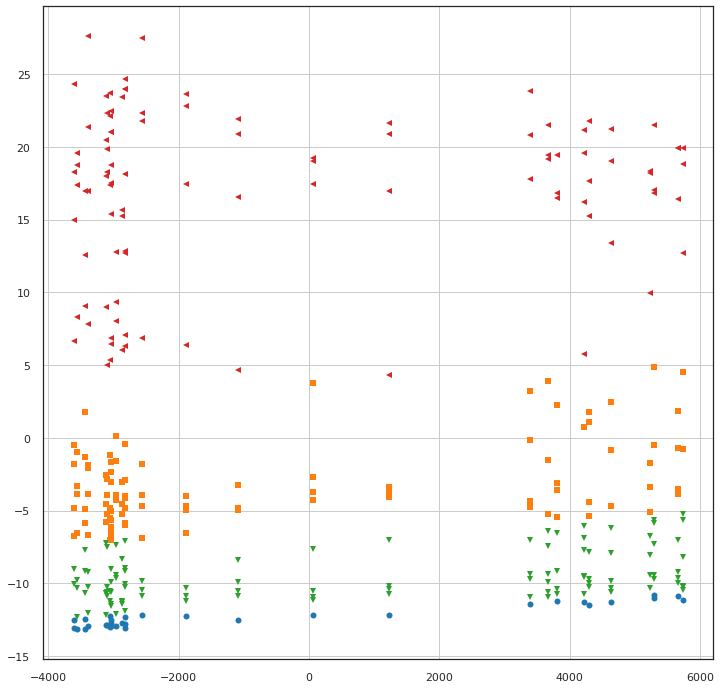

In [0]:
plot2d(X[(X[:, 0] == 'Romania'), 1:], Y[(X[:, 0] == 'Romania')], Y[(X[:, 0] == 'Romania')], PCA)

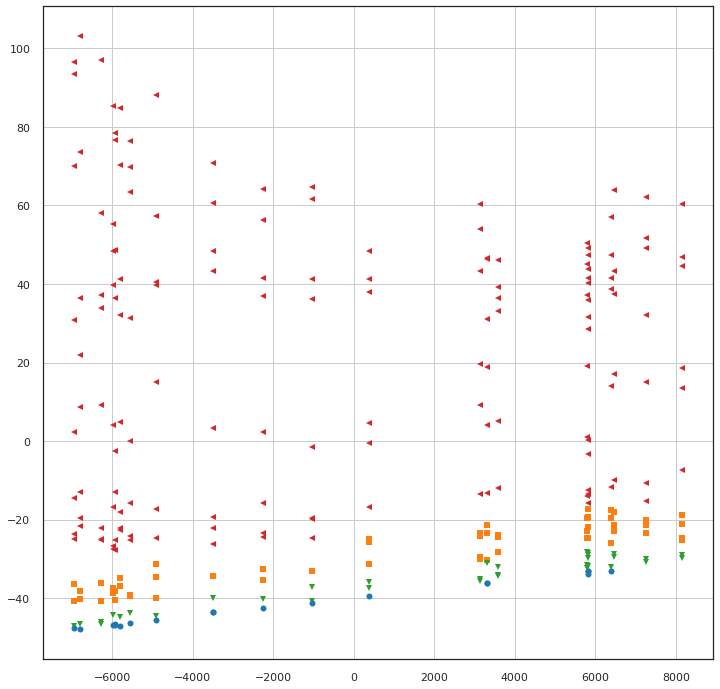

In [0]:
plot2d(X[(X[:, 0] == 'Lithuania'), 1:], Y[(X[:, 0] == 'Lithuania')], Y[(X[:, 0] == 'Lithuania')], PCA)

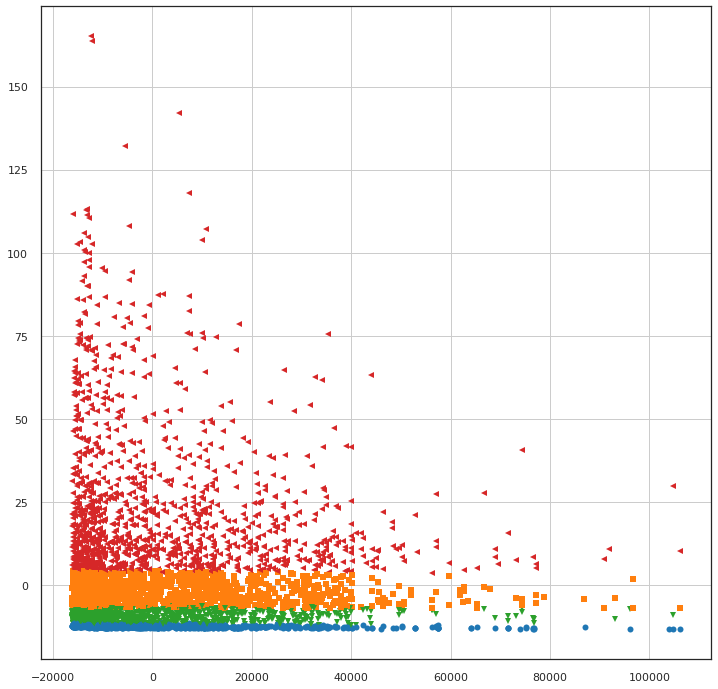

In [0]:
rperm = np.random.permutation(X.shape[0])
plot2d(X[rperm[:5000], 1:], Y[rperm[:5000]], Y[rperm[:5000]], PCA)

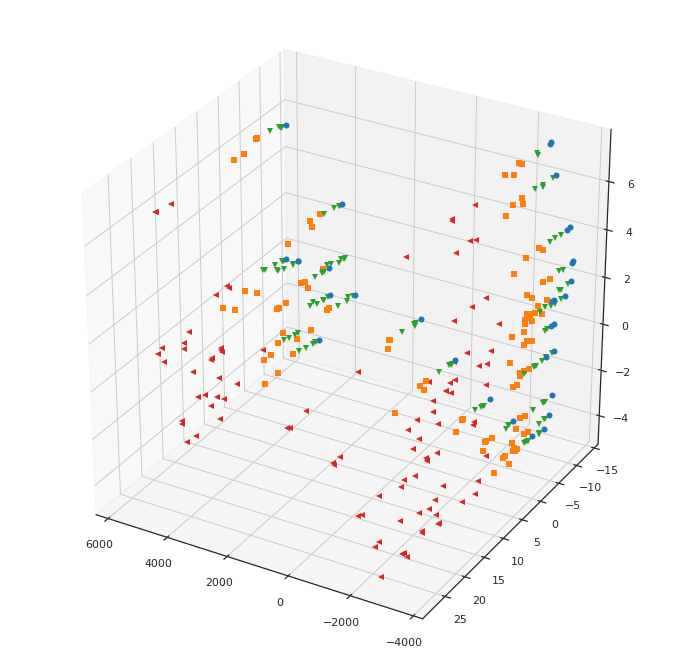

In [0]:
plot3d(X[(X[:, 0] == 'Romania'), 1:], Y[(X[:, 0] == 'Romania')], Y[(X[:, 0] == 'Romania')], PCA)

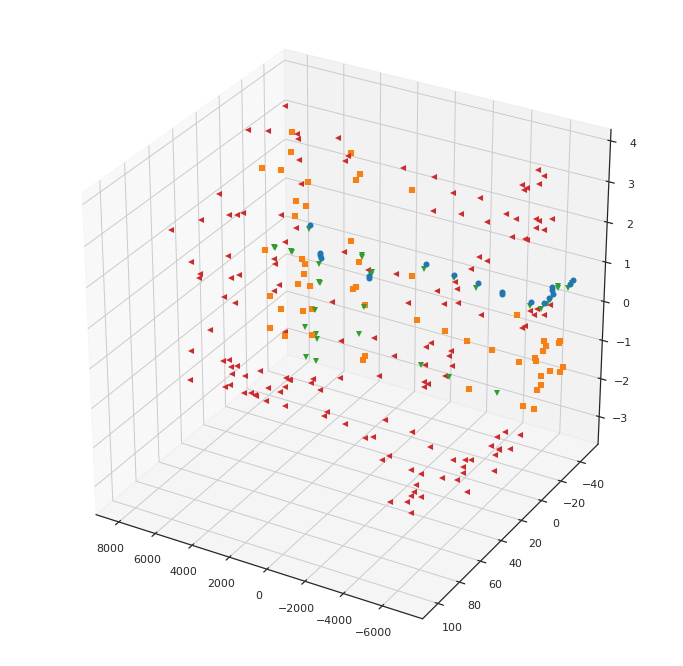

In [0]:
plot3d(X[(X[:, 0] == 'Lithuania'), 1:], Y[(X[:, 0] == 'Lithuania')], Y[(X[:, 0] == 'Lithuania')], PCA)

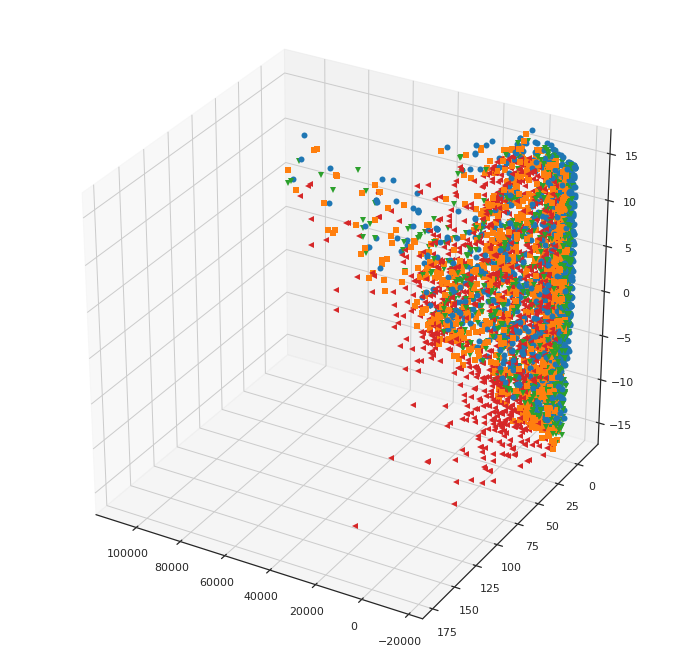

In [0]:
rperm = np.random.permutation(X.shape[0])
plot3d(X[rperm[:5000], 1:], Y[rperm[:5000]], Y[rperm[:5000]], PCA)

# **K-means**

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(X[:, 1:])

In [0]:
for country in countries:
    lines = (X[:, 0] == country)
    print(country)
    labels = kmeans.labels_[lines]
    print('0: '+ str(np.sum(labels == 0)) + '\t\t1: '+ str(np.sum(labels == 1)) + '\t\t2: '+ str(np.sum(labels == 2)) + '\t\t3: '+ str(np.sum(labels == 3)))

Albania
0: 264		1: 0		2: 0		3: 0
Antigua and Barbuda
0: 288		1: 36		2: 0		3: 0
Argentina
0: 360		1: 12		2: 0		3: 0
Armenia
0: 298		1: 0		2: 0		3: 0
Aruba
0: 0		1: 168		2: 0		3: 0
Australia
0: 36		1: 204		2: 96		3: 24
Austria
0: 24		1: 204		2: 154		3: 0
Azerbaijan
0: 192		1: 0		2: 0		3: 0
Bahamas
0: 72		1: 204		2: 0		3: 0
Bahrain
0: 96		1: 156		2: 0		3: 0
Barbados
0: 192		1: 108		2: 0		3: 0
Belarus
0: 252		1: 0		2: 0		3: 0
Belgium
0: 24		1: 204		2: 144		3: 0
Belize
0: 336		1: 0		2: 0		3: 0
Bosnia and Herzegovina
0: 24		1: 0		2: 0		3: 0
Brazil
0: 372		1: 0		2: 0		3: 0
Bulgaria
0: 360		1: 0		2: 0		3: 0
Cabo Verde
0: 12		1: 0		2: 0		3: 0
Canada
0: 0		1: 240		2: 108		3: 0
Chile
0: 324		1: 48		2: 0		3: 0
Colombia
0: 372		1: 0		2: 0		3: 0
Costa Rica
0: 360		1: 0		2: 0		3: 0
Croatia
0: 226		1: 36		2: 0		3: 0
Cuba
0: 288		1: 0		2: 0		3: 0
Cyprus
0: 24		1: 142		2: 12		3: 0
Czech Republic
0: 192		1: 130		2: 0		3: 0
Denmark
0: 0		1: 84		2: 180		3: 0
Dominica
0: 12		1: 0		2: 0		3: 0
Ecuador
0: 372	

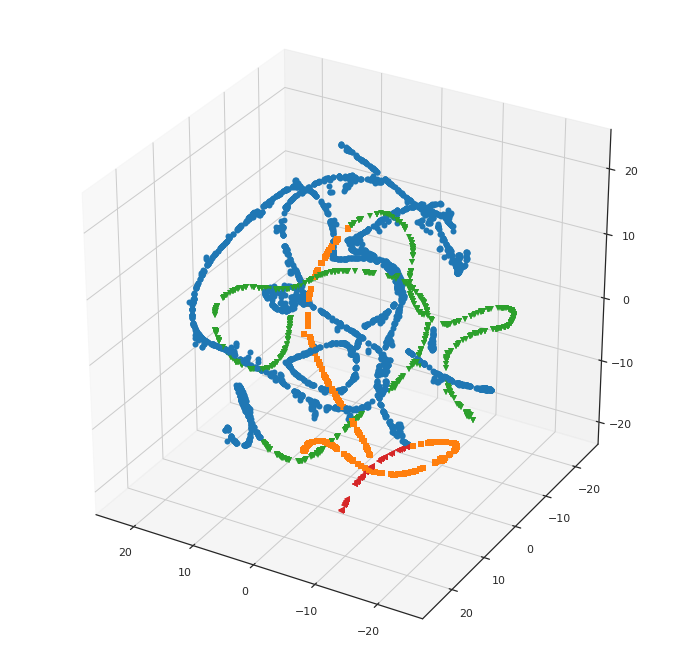

In [0]:
rperm = np.random.permutation(X.shape[0])
plot3d(X[rperm[:5000], 1:], kmeans.labels_[rperm[:5000]], kmeans.labels_[rperm[:5000]], mode=TSNE)

In [0]:
import sklearn
sklearn.metrics.silhouette_score(X[:, 1:], kmeans.labels_)

0.663034352908275

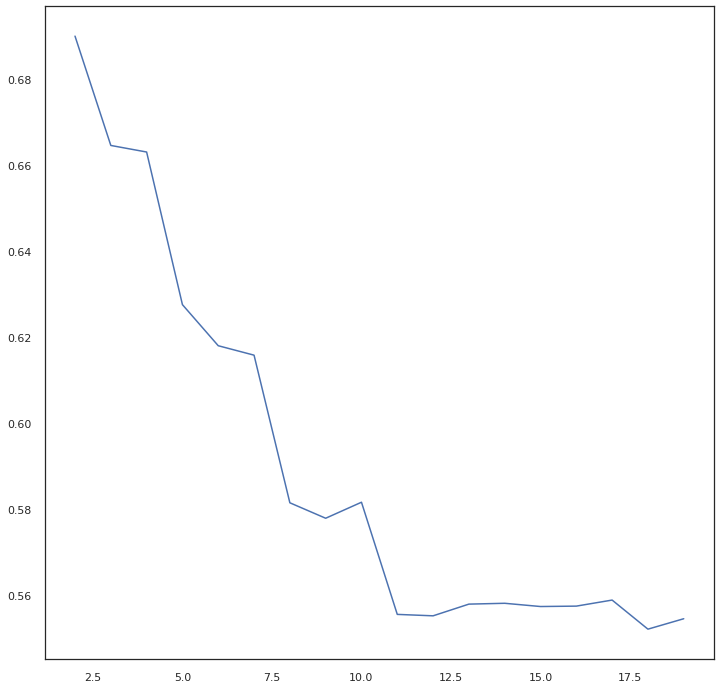

In [0]:
maximum = sklearn.metrics.silhouette_score(X[:, 1:], kmeans.labels_)
optimum = 4
labels = kmeans.labels_
scores = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X[:, 1:])
    silhouette_score = sklearn.metrics.silhouette_score(X[:, 1:], kmeans.labels_)
    if silhouette_score > maximum:
        maximum = silhouette_score
        optimum = i
        labels = kmeans.labels_
    scores.append(silhouette_score)

plt.plot(range(2, 20), scores)

In [0]:
print(optimum)
print(maximum)

2
0.6900002581865811


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fad8af07898>,
                     model=None)

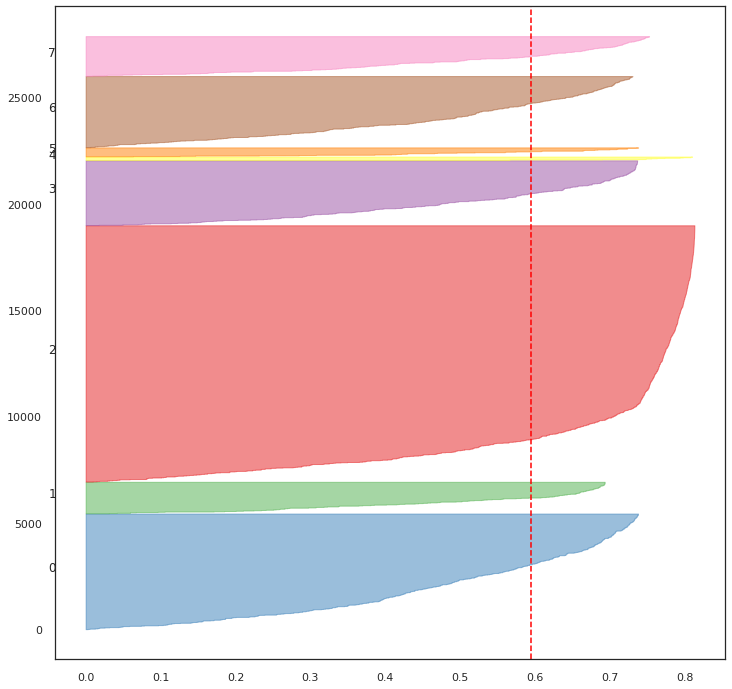

In [0]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(2,21))

visualizer.fit(X[:, 1:])        # Fit the data to the visualizer

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fad8b34f588>,
                 k=None, metric=None, model=None, timings=True)

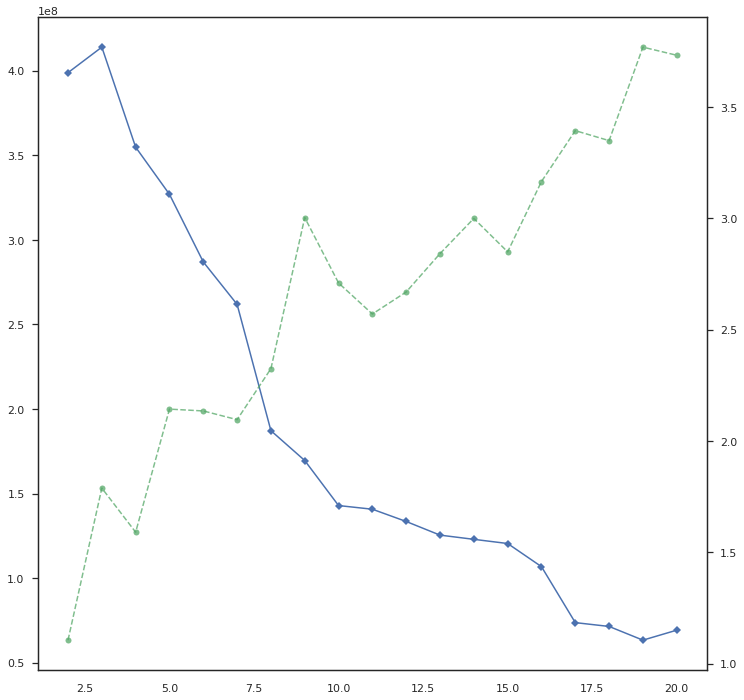

In [0]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,21))

visualizer.fit(X[:, 1:])        # Fit the data to the visualizer

In [0]:
C = 2
kmeans = KMeans(n_clusters=C, random_state=42).fit(X[:, 1:])

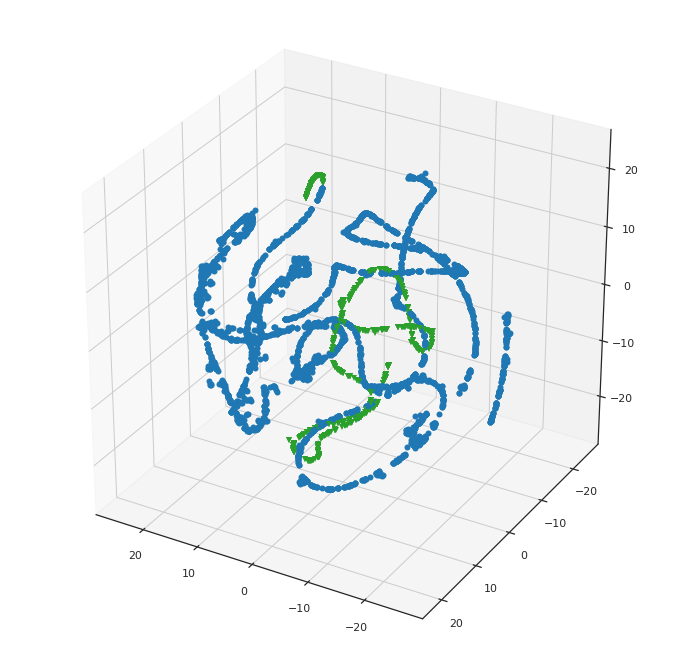

In [0]:
rperm = np.random.permutation(X.shape[0])
plot3d(X[rperm[:5000], 1:], kmeans.labels_[rperm[:5000]], kmeans.labels_[rperm[:5000]], mode=TSNE)

In [0]:
sklearn.metrics.silhouette_score(X[:, 1:], kmeans.labels_)

0.6900002581865811

In [0]:
sklearn.metrics.calinski_harabasz_score(X[:, 1:], kmeans.labels_)

56457.285885209705

In [0]:
sklearn.metrics.davies_bouldin_score(X[:, 1:], kmeans.labels_)

0.5207840528984851

In [0]:
ans = {x : [] for x in range(C)}
for country in countries:
    lines = (X[:, 0] == country)
    labels = kmeans.labels_[lines]
    ans[np.argmax([np.sum(labels == x)/np.sum(kmeans.labels_ == x) for x in range (C)])].append(country)

In [0]:
ans

{0: ['Albania',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Azerbaijan',
  'Bahrain',
  'Barbados',
  'Belarus',
  'Belize',
  'Bosnia and Herzegovina',
  'Brazil',
  'Bulgaria',
  'Cabo Verde',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Czech Republic',
  'Dominica',
  'Ecuador',
  'El Salvador',
  'Estonia',
  'Fiji',
  'Georgia',
  'Greece',
  'Grenada',
  'Guatemala',
  'Guyana',
  'Hungary',
  'Jamaica',
  'Kazakhstan',
  'Kiribati',
  'Kyrgyzstan',
  'Latvia',
  'Lithuania',
  'Macau',
  'Maldives',
  'Malta',
  'Mauritius',
  'Mexico',
  'Mongolia',
  'Montenegro',
  'Nicaragua',
  'Oman',
  'Panama',
  'Paraguay',
  'Philippines',
  'Poland',
  'Portugal',
  'Puerto Rico',
  'Republic of Korea',
  'Romania',
  'Russian Federation',
  'Saint Kitts and Nevis',
  'Saint Lucia',
  'Saint Vincent and Grenadines',
  'Serbia',
  'Seychelles',
  'Slovakia',
  'Slovenia',
  'South Africa',
  'Sri Lanka',
  'Suriname',
  'Thailand',
  'Trini

In [0]:
! pip install pycountry

     |████████████████████████████████| 10.0MB 354kB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627360 sha256=45da906afbba096cfe753caac0a127ff1287d8ecebea22c7ecf36c8389f6e4cb
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry


In [0]:
import pycountry

def make_preprocessing_for_countries_plot(model_labels = None):
    countries_df = []
    inv_ans = []
    iso_alpha = []

    C = len(set(model_labels)) - (1 if -1 in model_labels else 0)

    for country in countries:
        lines = (X[:, 0] == country)
        labels = model_labels[lines]
        try:
            a = pycountry.countries.search_fuzzy(country)[0]
            if len(a.alpha_3) != 3:
                break
            countries_df.append(country)
            lb = np.argmax([np.sum(labels == x)/np.sum(model_labels == x) for x in range (C)])
            inv_ans.append(lb)
            iso_alpha.append(a.alpha_3)
        except:
            pass

    return pd.DataFrame({'country': countries_df, 'label': inv_ans, 'iso_alpha': iso_alpha})

In [0]:
dataset_plot = make_preprocessing_for_countries_plot(kmeans.labels_)

import plotly.express as px

fig = px.choropleth(dataset_plot, locations="iso_alpha",
                    color="label", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [0]:
C = 17
kmeans = KMeans(n_clusters=C, random_state=42).fit(X[:, 1:])

In [0]:
sklearn.metrics.silhouette_score(X[:, 1:], kmeans.labels_)

0.5587813342807447

In [0]:
sklearn.metrics.calinski_harabasz_score(X[:, 1:], kmeans.labels_)

361804.44910219935

In [0]:
sklearn.metrics.davies_bouldin_score(X[:, 1:], kmeans.labels_)

0.4752099354137544

In [0]:
ans = {x : [] for x in range(C)}
for country in countries:
    lines = (X[:, 0] == country)
    labels = kmeans.labels_[lines]
    ans[np.argmax([np.sum(labels == x)/np.sum(kmeans.labels_ == x) for x in range (C)])].append(country)

In [0]:
ans

{0: ['Albania',
  'Armenia',
  'Azerbaijan',
  'Belarus',
  'Bulgaria',
  'Colombia',
  'Dominica',
  'Ecuador',
  'El Salvador',
  'Georgia',
  'Guatemala',
  'Guyana',
  'Kazakhstan',
  'Kiribati',
  'Kyrgyzstan',
  'Nicaragua',
  'Paraguay',
  'Philippines',
  'Romania',
  'Sri Lanka',
  'Suriname',
  'Thailand',
  'Turkmenistan',
  'Ukraine',
  'Uzbekistan'],
 1: ['Germany', 'United Arab Emirates', 'United Kingdom'],
 2: ['Aruba',
  'Bahrain',
  'Czech Republic',
  'Estonia',
  'Israel',
  'Macau',
  'Oman',
  'Slovakia'],
 3: ['Norway'],
 4: ['Argentina',
  'Grenada',
  'Maldives',
  'Montenegro',
  'Saint Vincent and Grenadines',
  'Serbia',
  'South Africa',
  'Uruguay'],
 5: ['Denmark', 'Iceland', 'Sweden'],
 6: ['Bahamas', 'Cyprus', 'Puerto Rico'],
 7: ['Barbados',
  'Chile',
  'Croatia',
  'Hungary',
  'Latvia',
  'Lithuania',
  'New Zealand',
  'Poland',
  'Russian Federation',
  'Spain'],
 8: ['Australia', 'San Marino', 'Singapore'],
 9: ['Belize',
  'Bosnia and Herzegovina

In [0]:
dataset_plot = make_preprocessing_for_countries_plot(kmeans.labels_)

import plotly.express as px

fig = px.choropleth(dataset_plot, locations="iso_alpha",
                    color="label", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# **DBSCAN**

In [0]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1000, min_samples=50).fit(X[:, 1:])

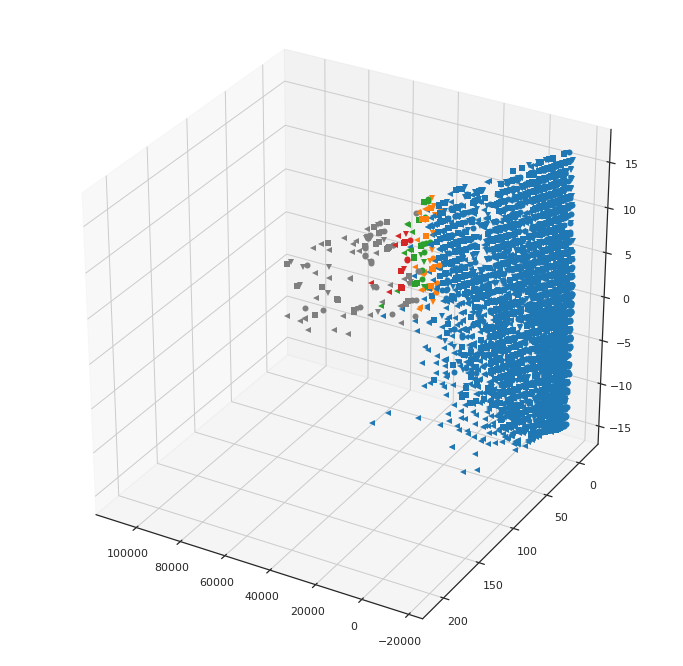

In [0]:
rperm = np.random.permutation(X.shape[0])
plot3d(X[rperm[:5000], 1:], dbscan.labels_[rperm[:5000]], Y[rperm[:5000]], mode=PCA)

In [0]:
# Number of clusters in labels, ignoring noise if present.
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

4
540


In [0]:
sklearn.metrics.silhouette_score(X[:, 1:], dbscan.labels_)

0.5720777556322646

In [0]:
for country in countries:
    lines = (X[:, 0] == country)
    print(country)
    labels = dbscan.labels_[lines]
    print('0: '+ str(np.sum(labels == 0)) + '\t\t1: '+ str(np.sum(labels == 1)) + '\t\t2: '+ str(np.sum(labels == 2)) + '\t\t3: '+ str(np.sum(labels == 3)))

Albania
0: 264		1: 0		2: 0		3: 0
Antigua and Barbuda
0: 324		1: 0		2: 0		3: 0
Argentina
0: 372		1: 0		2: 0		3: 0
Armenia
0: 298		1: 0		2: 0		3: 0
Aruba
0: 168		1: 0		2: 0		3: 0
Australia
0: 300		1: 24		2: 12		3: 24
Austria
0: 382		1: 0		2: 0		3: 0
Azerbaijan
0: 192		1: 0		2: 0		3: 0
Bahamas
0: 276		1: 0		2: 0		3: 0
Bahrain
0: 252		1: 0		2: 0		3: 0
Barbados
0: 300		1: 0		2: 0		3: 0
Belarus
0: 252		1: 0		2: 0		3: 0
Belgium
0: 372		1: 0		2: 0		3: 0
Belize
0: 336		1: 0		2: 0		3: 0
Bosnia and Herzegovina
0: 24		1: 0		2: 0		3: 0
Brazil
0: 372		1: 0		2: 0		3: 0
Bulgaria
0: 360		1: 0		2: 0		3: 0
Cabo Verde
0: 12		1: 0		2: 0		3: 0
Canada
0: 348		1: 0		2: 0		3: 0
Chile
0: 372		1: 0		2: 0		3: 0
Colombia
0: 372		1: 0		2: 0		3: 0
Costa Rica
0: 360		1: 0		2: 0		3: 0
Croatia
0: 262		1: 0		2: 0		3: 0
Cuba
0: 288		1: 0		2: 0		3: 0
Cyprus
0: 178		1: 0		2: 0		3: 0
Czech Republic
0: 322		1: 0		2: 0		3: 0
Denmark
0: 168		1: 36		2: 48		3: 0
Dominica
0: 12		1: 0		2: 0		3: 0
Ecuador
0: 372		1: 0		2: 0		3: 0
E

In [0]:
maximum = sklearn.metrics.silhouette_score(X[:, 1:], dbscan.labels_)
optimum = 4
model = dbscan
eps=1000
min_samples=50
scores = []
epss = []
min_sampless = []
for eps_idx in range(1000, 3000, 250):
    for min_samples_idx in range(10, 50, 5):
        dbscan = DBSCAN(eps=eps_idx, min_samples=min_samples_idx).fit(X[:, 1:])
        if len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0) <= 1:
            continue
        silhouette_score = sklearn.metrics.silhouette_score(X[:, 1:], dbscan.labels_)
        if silhouette_score > maximum:
            maximum = silhouette_score
            optimum = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            model = dbscan
            eps=eps_idx
            min_samples=min_samples_idx
        scores.append(silhouette_score)
        epss.append(eps_idx)
        min_sampless.append(min_samples_idx)

In [0]:
print(optimum)
print(maximum)
print(eps)
print(min_samples)

3
0.776000676586375
2250
25


In [0]:
sklearn.metrics.calinski_harabasz_score(X[:, 1:], model.labels_)

1722.4147020209623

In [0]:
sklearn.metrics.davies_bouldin_score(X[:, 1:], model.labels_)

5.65489960632861

In [0]:
# Number of clusters in labels, ignoring noise if present.
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(n_clusters_)
print(n_noise_)

3
36


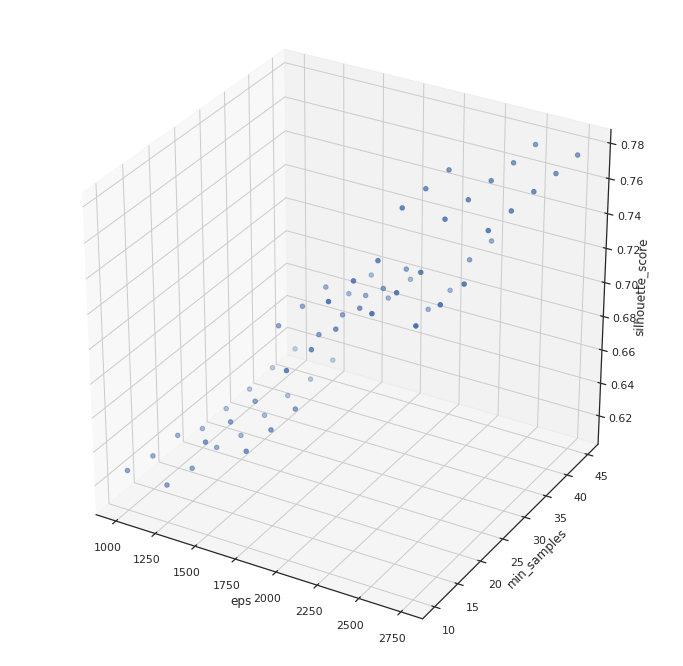

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(epss, min_sampless, scores)

ax.set_xlabel('eps')
ax.set_ylabel('min_samples')
ax.set_zlabel('silhouette_score')

plt.show()

In [0]:
ans = {x : [] for x in range(optimum)}
for country in countries:
    lines = (X[:, 0] == country)
    labels = model.labels_[lines]
    ans[np.argmax([np.sum(labels == x)/np.sum(model.labels_ == x) for x in range (optimum)])].append(country)

In [0]:
ans

{0: ['Albania',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Azerbaijan',
  'Bahamas',
  'Bahrain',
  'Barbados',
  'Belarus',
  'Belgium',
  'Belize',
  'Bosnia and Herzegovina',
  'Brazil',
  'Bulgaria',
  'Cabo Verde',
  'Canada',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Dominica',
  'Ecuador',
  'El Salvador',
  'Estonia',
  'Fiji',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Greece',
  'Grenada',
  'Guatemala',
  'Guyana',
  'Hungary',
  'Iceland',
  'Ireland',
  'Israel',
  'Italy',
  'Jamaica',
  'Japan',
  'Kazakhstan',
  'Kiribati',
  'Kuwait',
  'Kyrgyzstan',
  'Latvia',
  'Lithuania',
  'Macau',
  'Maldives',
  'Malta',
  'Mauritius',
  'Mexico',
  'Mongolia',
  'Montenegro',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Oman',
  'Panama',
  'Paraguay',
  'Philippines',
  'Poland',
  'Portugal',
  'Puerto Rico',
  'Qatar',
  'Republic of Ko

In [0]:
dataset_plot = make_preprocessing_for_countries_plot(model.labels_)

import plotly.express as px

fig = px.choropleth(dataset_plot, locations="iso_alpha",
                    color="label", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# **Hierarchical Clustering**

In [0]:
from scipy.cluster import hierarchy as hc

In [0]:
dataset3.columns

Index(['country', 'year', 'sex', 'age', 'suicides/100k pop', 'HDI for year',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [0]:
# Perform hierarchical clustering using single linkage
Z = hc.linkage(dataset3[dataset3.columns[1:]], 'single')

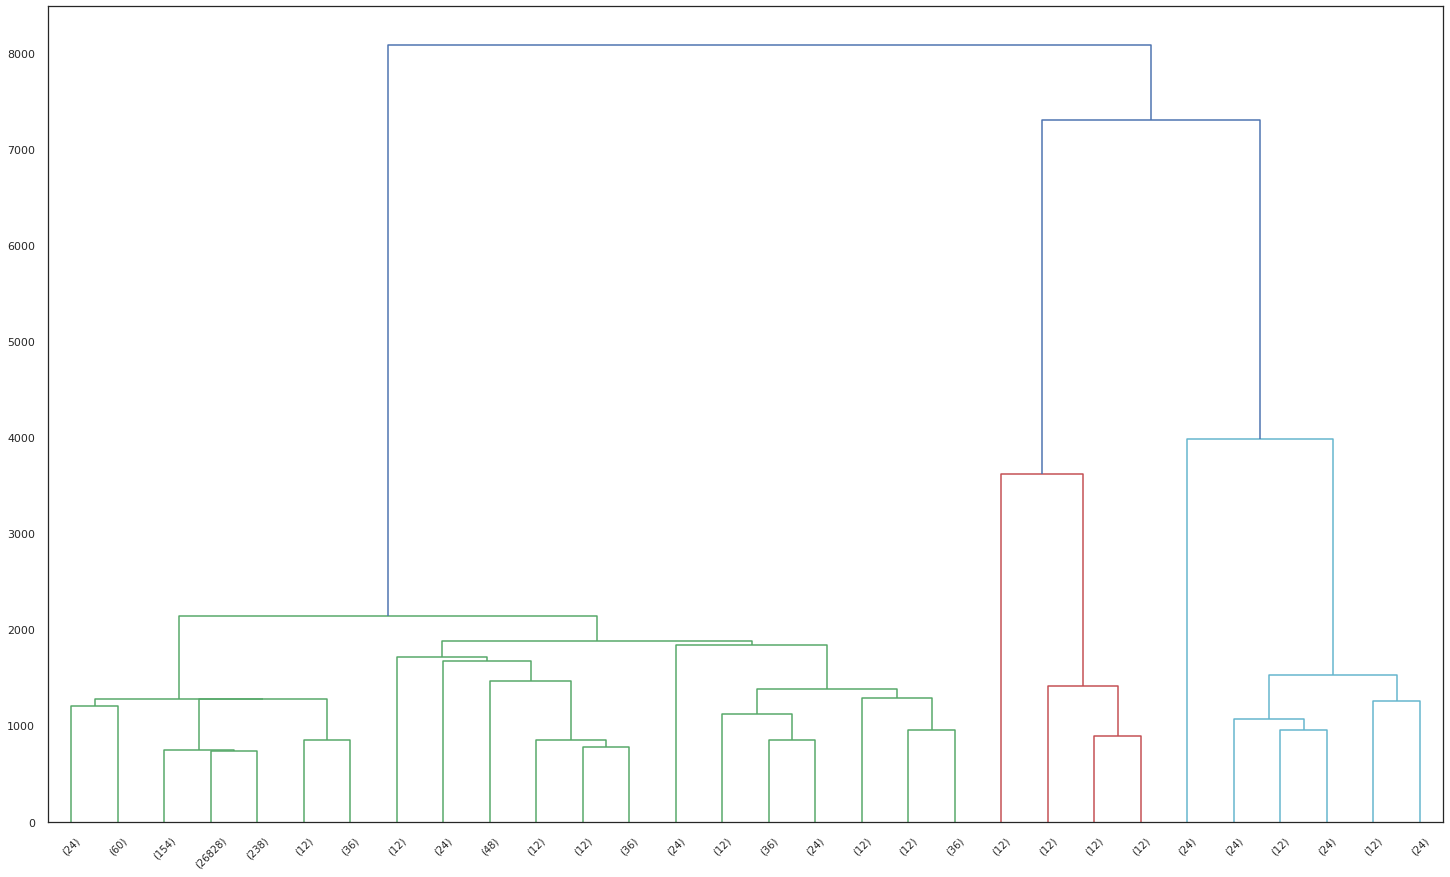

In [0]:
fig = plt.figure(figsize=(25, 15))
dn = hc.dendrogram(Z, labels=dataset3['country'].values, truncate_mode='lastp', p = 30)
plt.show()

In [0]:
# Perform hierarchical clustering using Ward linkage
Z = hc.linkage(dataset3[dataset3.columns[1:]], 'ward', metric='euclidean')

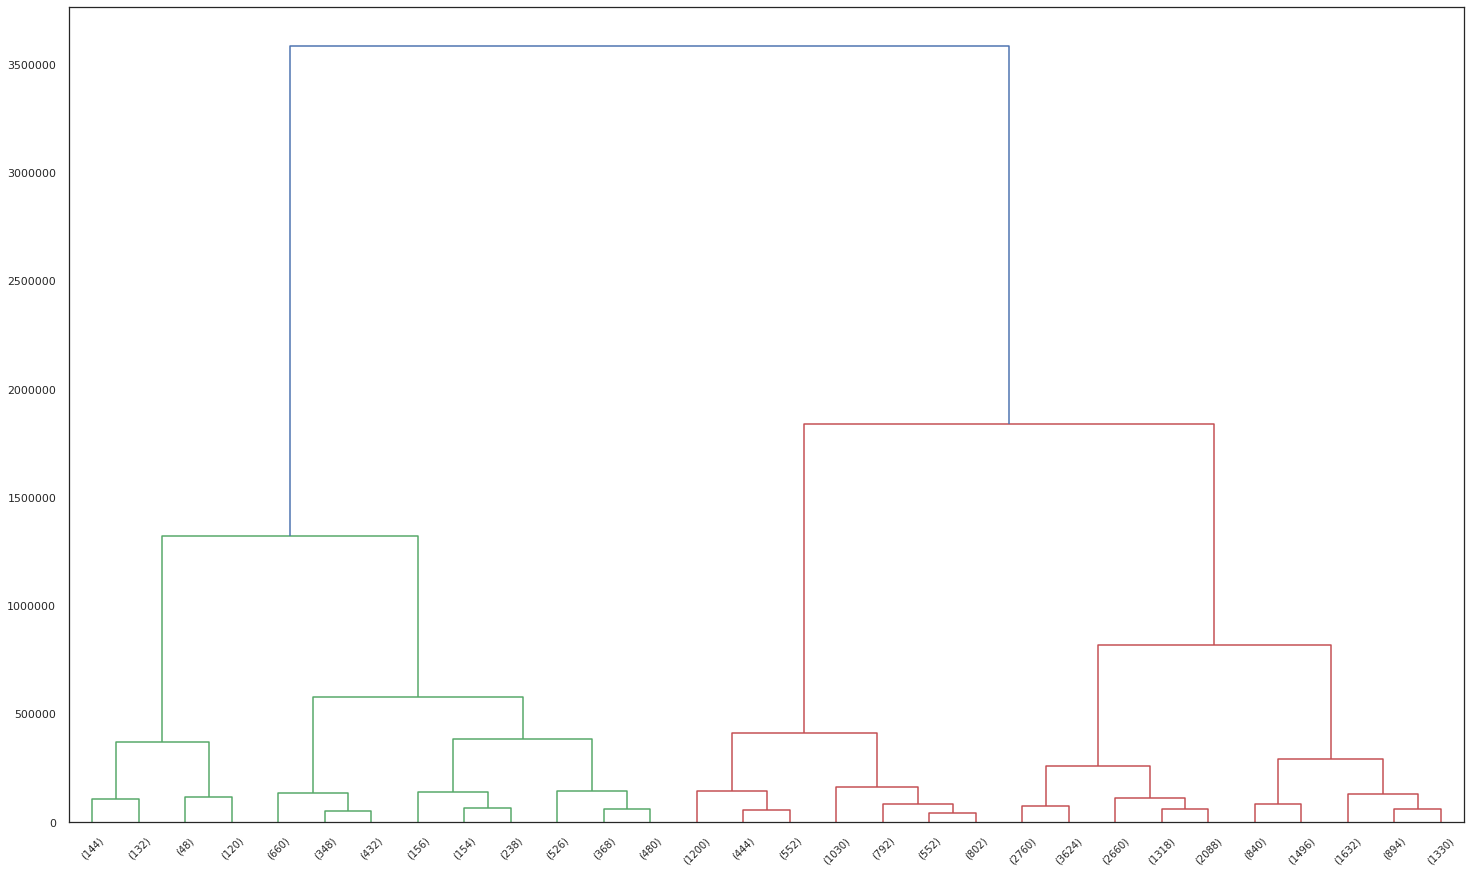

In [0]:
fig = plt.figure(figsize=(25, 15))
dn = hc.dendrogram(Z, labels=dataset3['country'].values, truncate_mode='lastp', p = 30)
plt.show()

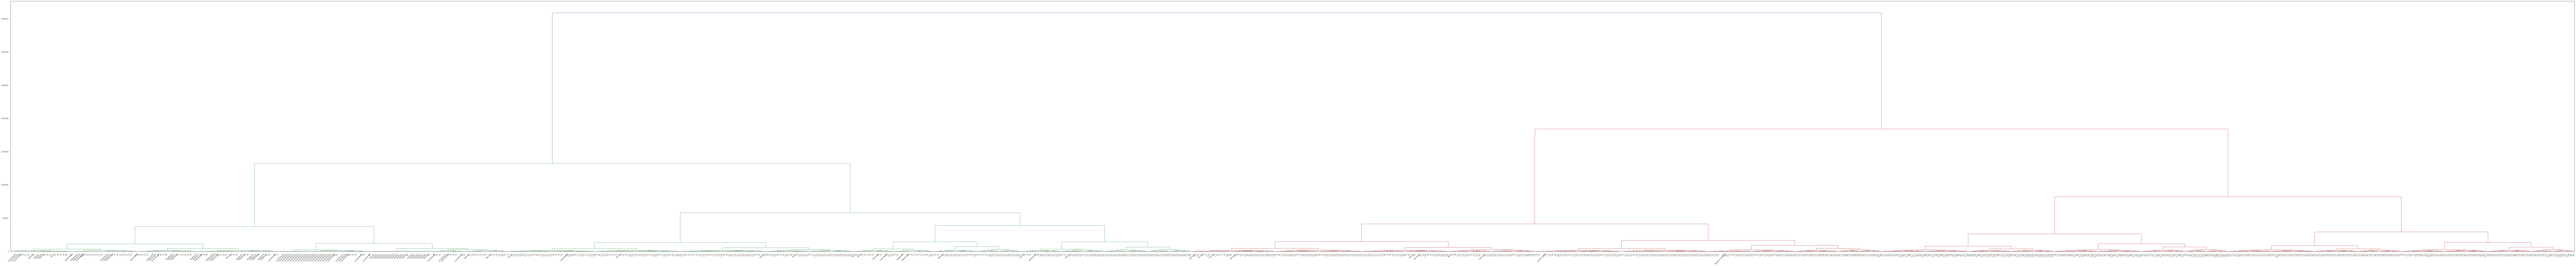

In [0]:
fig = plt.figure(figsize=(300, 30))
dn = hc.dendrogram(Z, labels=dataset3['country'].values, truncate_mode='level', p = 9, leaf_font_size = 11, leaf_rotation = 45)
plt.show()

In [0]:
C = 4
clusters = hc.fcluster(Z, t=C, criterion='maxclust') - 1

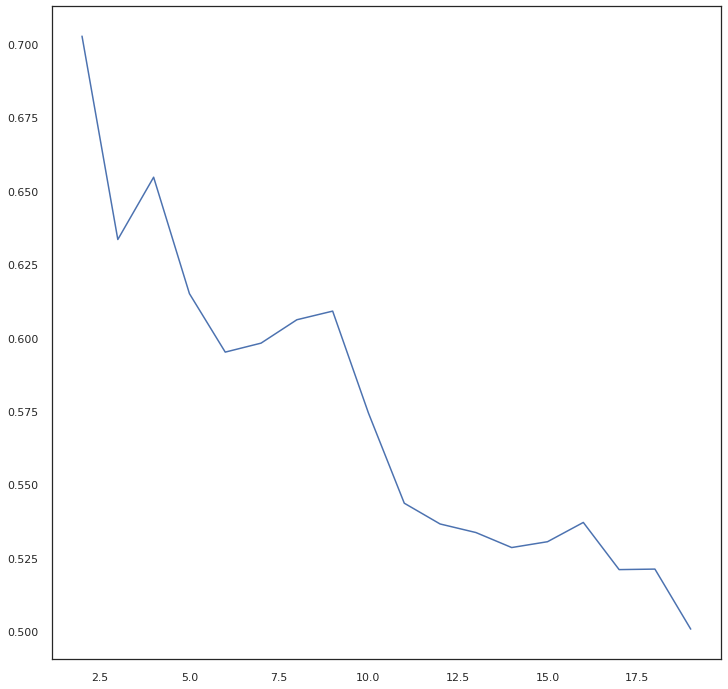

In [0]:
maximum = sklearn.metrics.silhouette_score(X[:, 1:], clusters)
optimum = 4
labels = clusters
scores = []
for i in range(2, 20):
    clusters = hc.fcluster(Z, t=i, criterion='maxclust') - 1
    silhouette_score = sklearn.metrics.silhouette_score(X[:, 1:], clusters)
    if silhouette_score > maximum:
        maximum = silhouette_score
        optimum = i
        labels = clusters
    scores.append(silhouette_score)

plt.plot(range(2, 20), scores)

In [0]:
print(optimum)
print(maximum)

2
0.7027479491017214


In [0]:
clusters = hc.fcluster(Z, t=9, criterion='maxclust') - 1

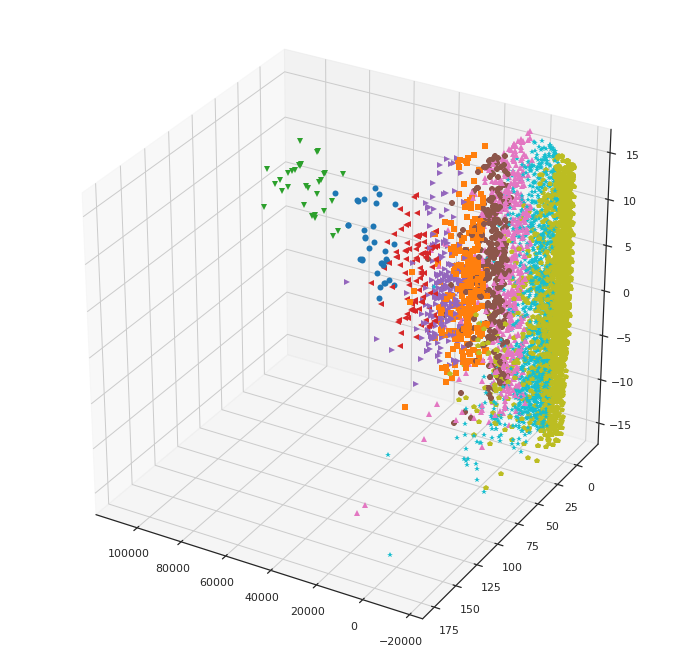

In [0]:
rperm = np.random.permutation(X.shape[0])
plot3d(X[rperm[:5000], 1:], clusters[rperm[:5000]], clusters[rperm[:5000]], mode=PCA)

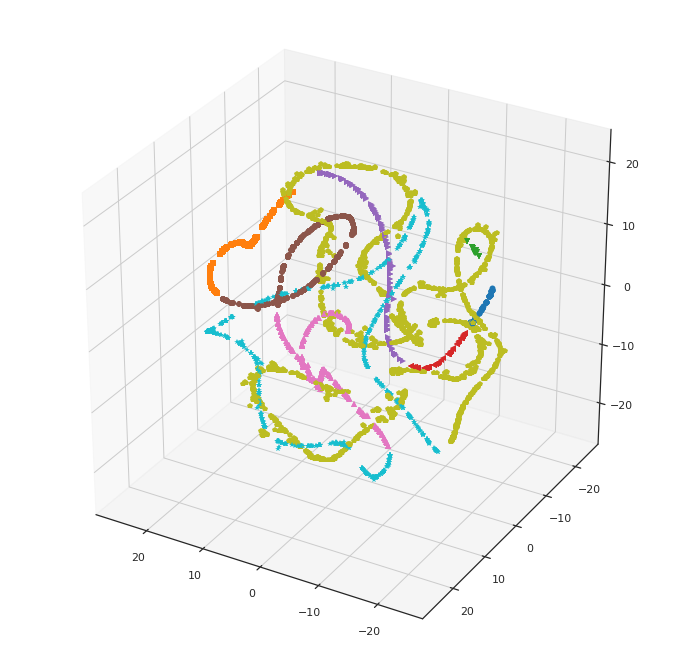

In [0]:
rperm = np.random.permutation(X.shape[0])
plot3d(X[rperm[:5000], 1:], clusters[rperm[:5000]], clusters[rperm[:5000]], mode=TSNE)

In [0]:
sklearn.metrics.silhouette_score(X[:, 1:], clusters)

0.6091092661388211

In [0]:
sklearn.metrics.calinski_harabasz_score(X[:, 1:], clusters)

173784.357064315

In [0]:
sklearn.metrics.davies_bouldin_score(X[:, 1:], clusters)

0.4845368027661692

In [0]:
sklearn.metrics.cluster.contingency_matrix(X[:, 0], clusters)

array([[  0,   0,   0,   0,   0,   0,   0, 264,   0],
       [  0,   0,   0,   0,   0,   0,   0,  60, 264],
       [  0,   0,   0,   0,   0,   0,   0, 156, 216],
       [  0,   0,   0,   0,   0,   0,   0, 298,   0],
       [  0,   0,   0,   0,   0,  24, 132,   0,  12],
       [  0,   0,  36,  60,  24,  12, 180,   0,  48],
       [  0,   0,  48,   0, 106,  84, 108,   0,  36],
       [  0,   0,   0,   0,   0,   0,   0, 192,   0],
       [  0,   0,   0,   0,   0, 180,  24,   0,  72],
       [  0,   0,   0,   0,   0,  12, 108,   0, 132],
       [  0,   0,   0,   0,   0,   0,   0,  36, 264],
       [  0,   0,   0,   0,   0,   0,   0, 228,  24],
       [  0,   0,  48,   0,  96,  36, 132,   0,  60],
       [  0,   0,   0,   0,   0,   0,   0, 336,   0],
       [  0,   0,   0,   0,   0,   0,   0,  24,   0],
       [  0,   0,   0,   0,   0,   0,   0, 264, 108],
       [  0,   0,   0,   0,   0,   0,   0, 312,  48],
       [  0,   0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,  36,   0, 

In [0]:
ans = {x : [] for x in range(8)}
for country in countries:
    lines = (X[:, 0] == country)
    labels = clusters[lines]
    ans[np.argmax([np.sum(labels == x)/np.sum(clusters == x) for x in range (8)])].append(country)

In [0]:
ans

{0: ['Macau', 'Qatar', 'Singapore', 'Switzerland', 'Turkey'],
 1: ['Luxembourg', 'Norway'],
 2: ['France',
  'Italy',
  'Japan',
  'Kuwait',
  'United Arab Emirates',
  'United Kingdom'],
 3: ['Australia', 'Denmark', 'Iceland', 'Ireland', 'San Marino', 'Sweden'],
 4: ['Austria', 'Belgium', 'Finland', 'Netherlands', 'United States'],
 5: ['Bahamas', 'Cyprus', 'Germany', 'New Zealand', 'Puerto Rico', 'Spain'],
 6: ['Aruba',
  'Bahrain',
  'Canada',
  'Czech Republic',
  'Estonia',
  'Greece',
  'Israel',
  'Malta',
  'Oman',
  'Portugal',
  'Republic of Korea',
  'Slovakia',
  'Slovenia'],
 7: ['Albania',
  'Antigua and Barbuda',
  'Argentina',
  'Armenia',
  'Azerbaijan',
  'Barbados',
  'Belarus',
  'Belize',
  'Bosnia and Herzegovina',
  'Brazil',
  'Bulgaria',
  'Cabo Verde',
  'Chile',
  'Colombia',
  'Costa Rica',
  'Croatia',
  'Cuba',
  'Dominica',
  'Ecuador',
  'El Salvador',
  'Fiji',
  'Georgia',
  'Grenada',
  'Guatemala',
  'Guyana',
  'Hungary',
  'Jamaica',
  'Kazakhstan'

In [0]:
dataset_plot = make_preprocessing_for_countries_plot(clusters)

import plotly.express as px

fig = px.choropleth(dataset_plot, locations="iso_alpha",
                    color="label", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [0]:
# Perform hierarchical clustering using centroid linkage
Z = hc.linkage(dataset3[dataset3.columns[1:]], 'centroid', metric='euclidean')

In [0]:
C = 4
clusters = hc.fcluster(Z, t=C, criterion='maxclust') - 1

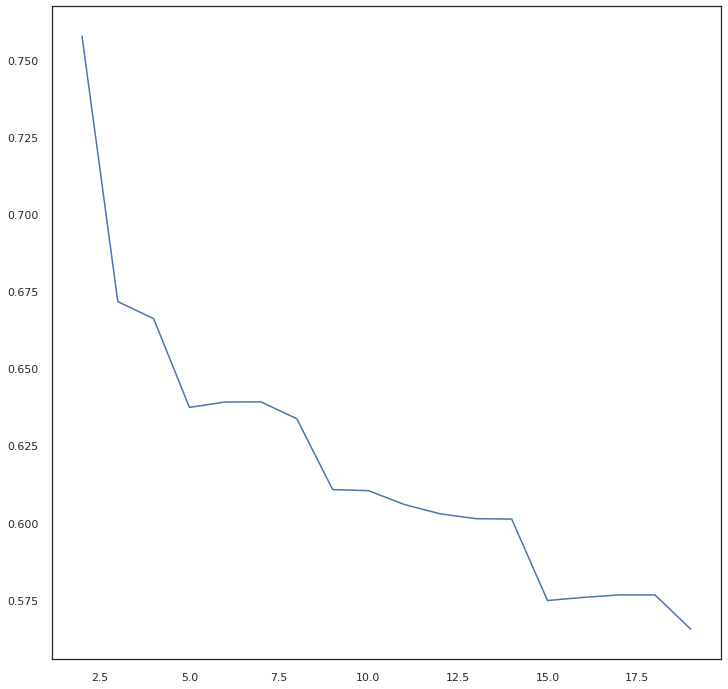

In [0]:
maximum = sklearn.metrics.silhouette_score(X[:, 1:], clusters)
optimum = 4
labels = clusters
scores = []
for i in range(2, 20):
    clusters = hc.fcluster(Z, t=i, criterion='maxclust') - 1
    silhouette_score = sklearn.metrics.silhouette_score(X[:, 1:], clusters)
    if silhouette_score > maximum:
        maximum = silhouette_score
        optimum = i
        labels = clusters
    scores.append(silhouette_score)

plt.plot(range(2, 20), scores)

In [0]:
print(optimum)
print(maximum)

2
0.7576781373210779


In [0]:
clusters = hc.fcluster(Z, t=14, criterion='maxclust') - 1

In [0]:
sklearn.metrics.silhouette_score(X[:, 1:], clusters)

0.6012200008657712

In [0]:
sklearn.metrics.calinski_harabasz_score(X[:, 1:], clusters)

120861.73736385346

In [0]:
sklearn.metrics.davies_bouldin_score(X[:, 1:], clusters)

0.4524143794567969

In [0]:
sklearn.metrics.cluster.contingency_matrix(X[:, 0], clusters)

array([[  0,   0,   0, ...,   0, 264,   0],
       [  0,   0,   0, ...,   0,  60, 264],
       [  0,   0,   0, ...,   0, 156, 216],
       ...,
       [  0,   0,   0, ...,  84,   0,  12],
       [  0,   0,   0, ...,   0, 216, 120],
       [  0,   0,   0, ...,   0, 264,   0]])

In [0]:
ans = {x : [] for x in range(14)}
for country in countries:
    lines = (X[:, 0] == country)
    labels = clusters[lines]
    ans[np.argmax([np.sum(labels == x)/np.sum(clusters == x) for x in range (14)])].append(country)

In [0]:
ans

{0: ['Qatar', 'Switzerland'],
 1: ['Singapore'],
 2: ['Luxembourg'],
 3: ['Norway'],
 4: [],
 5: ['Belgium',
  'Finland',
  'France',
  'Kuwait',
  'United Arab Emirates',
  'United Kingdom'],
 6: ['Germany', 'Italy', 'Japan'],
 7: ['Austria', 'Ireland', 'Netherlands', 'Sweden', 'United States'],
 8: ['Australia', 'Iceland'],
 9: ['Denmark', 'San Marino'],
 10: ['Bahamas', 'Cyprus', 'New Zealand', 'Puerto Rico', 'Spain'],
 11: ['Aruba',
  'Bahrain',
  'Canada',
  'Czech Republic',
  'Greece',
  'Israel',
  'Malta',
  'Oman',
  'Portugal',
  'Slovenia'],
 12: ['Albania',
  'Armenia',
  'Azerbaijan',
  'Belarus',
  'Belize',
  'Bosnia and Herzegovina',
  'Brazil',
  'Bulgaria',
  'Cabo Verde',
  'Colombia',
  'Costa Rica',
  'Cuba',
  'Dominica',
  'Ecuador',
  'El Salvador',
  'Fiji',
  'Georgia',
  'Guatemala',
  'Guyana',
  'Jamaica',
  'Kazakhstan',
  'Kiribati',
  'Kyrgyzstan',
  'Maldives',
  'Mauritius',
  'Mongolia',
  'Montenegro',
  'Nicaragua',
  'Panama',
  'Paraguay',
  'Phi

In [0]:
dataset_plot = make_preprocessing_for_countries_plot(clusters)

import plotly.express as px

fig = px.choropleth(dataset_plot, locations="iso_alpha",
                    color="label", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [0]:
! pip install fastcluster

     |████████████████████████████████| 163kB 2.8MB/s 


In [0]:
import fastcluster
import scipy
Z = fastcluster.linkage(dataset3[dataset3.columns[1:]], method="ward")

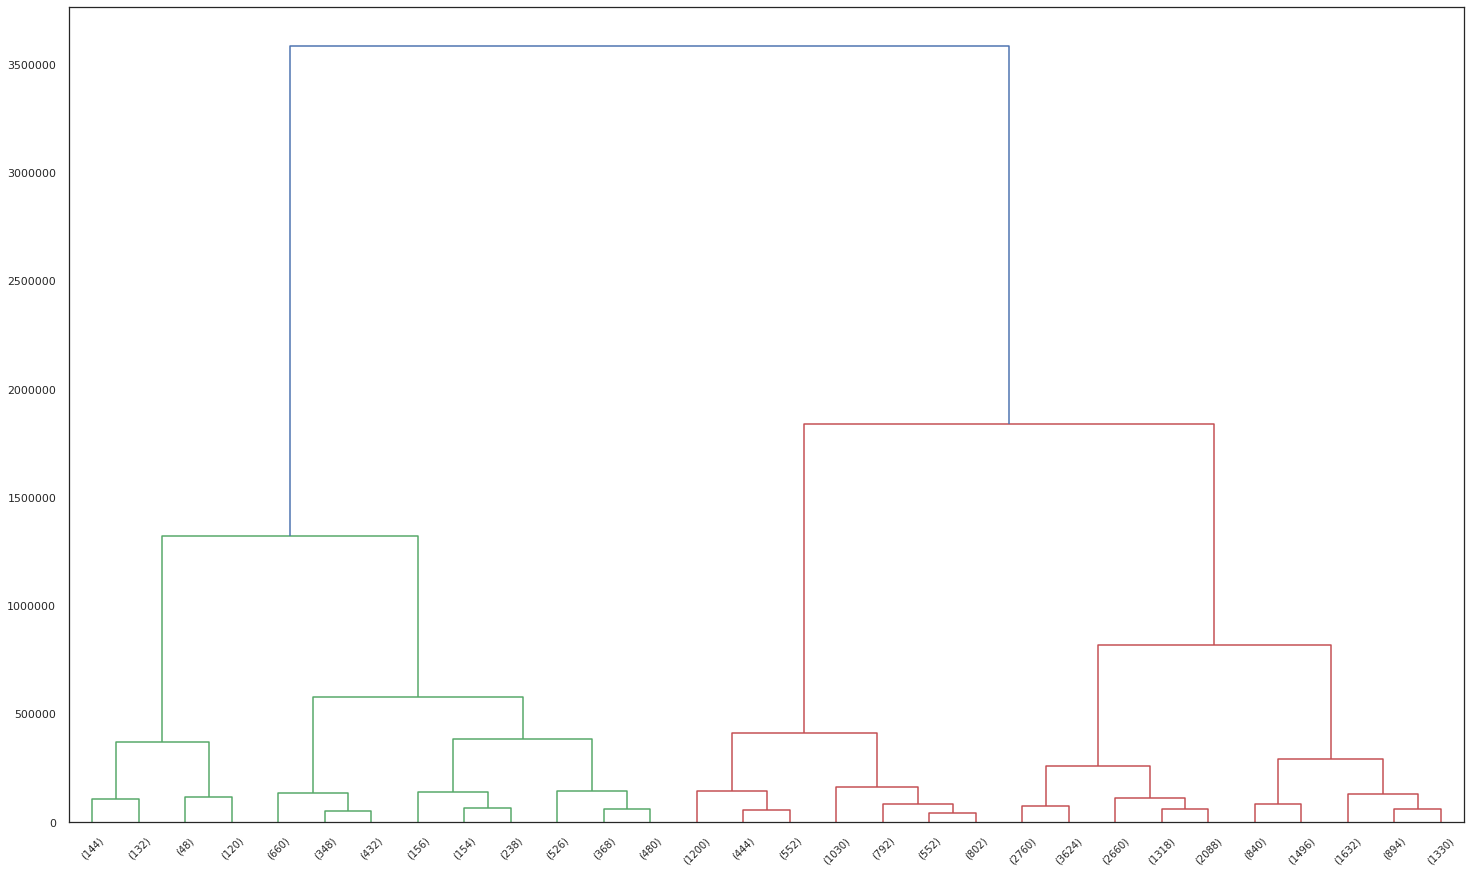

In [0]:
fig = plt.figure(figsize=(25, 15))
dn = hc.dendrogram(Z, labels=dataset3['country'].values, truncate_mode='lastp', p = 30)
plt.show()